# 02 Data Wrangling

Cyber Threat Dataset: Network, Text & Relation

Source - https://www.kaggle.com/datasets/ramoliyafenil/text-based-cyber-threat-detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
df = pd.read_csv("cyber-threat-intelligence_all.csv")

In [3]:
df.head()

Unnamed: 0  index                                               text  \
0           0    1.0  This post is also available in:      日本語 (Japa...   
1           1    2.0  The attack vector is very basic and repeats it...   
2           2    3.0  Once executed by the user the first stage malw...   
3           3    4.0   The first known campaign was launched by Crim...   
4           4    5.0  The first stage downloaded the ransomware from...   

                                            entities relations Comments  \
0  [{'id': 45800, 'label': 'malware', 'start_offs...        []       []   
1  [{'id': 48941, 'label': 'attack-pattern', 'sta...        []       []   
2                                                 []        []       []   
3  [{'id': 45806, 'label': 'TIME', 'start_offset'...        []       []   
4                                                 []        []       []   

        id           label  start_offset  end_offset  
0  45800.0         malware         288.0       300.0  
1  48941.0  attack-pattern          69.0       115.0  
2      NaN             NaN           NaN         NaN  
3  45806.0            TIME          55.0        68.0  
4      NaN             NaN           NaN         NaN

Drop the Unnamed:0 column

In [4]:
df = df.drop(df.columns[0], axis=1)

In [5]:
df.head()

index                                               text  \
0    1.0  This post is also available in:      日本語 (Japa...   
1    2.0  The attack vector is very basic and repeats it...   
2    3.0  Once executed by the user the first stage malw...   
3    4.0   The first known campaign was launched by Crim...   
4    5.0  The first stage downloaded the ransomware from...   

                                            entities relations Comments  \
0  [{'id': 45800, 'label': 'malware', 'start_offs...        []       []   
1  [{'id': 48941, 'label': 'attack-pattern', 'sta...        []       []   
2                                                 []        []       []   
3  [{'id': 45806, 'label': 'TIME', 'start_offset'...        []       []   
4                                                 []        []       []   

        id           label  start_offset  end_offset  
0  45800.0         malware         288.0       300.0  
1  48941.0  attack-pattern          69.0       115.0  
2      NaN             NaN           NaN         NaN  
3  45806.0            TIME          55.0        68.0  
4      NaN             NaN           NaN         NaN

Drop the index column

In [6]:
df = df.drop(df.columns[0], axis=1)

In [7]:
df.head()

text  \
0  This post is also available in:      日本語 (Japa...   
1  The attack vector is very basic and repeats it...   
2  Once executed by the user the first stage malw...   
3   The first known campaign was launched by Crim...   
4  The first stage downloaded the ransomware from...   

                                            entities relations Comments  \
0  [{'id': 45800, 'label': 'malware', 'start_offs...        []       []   
1  [{'id': 48941, 'label': 'attack-pattern', 'sta...        []       []   
2                                                 []        []       []   
3  [{'id': 45806, 'label': 'TIME', 'start_offset'...        []       []   
4                                                 []        []       []   

        id           label  start_offset  end_offset  
0  45800.0         malware         288.0       300.0  
1  48941.0  attack-pattern          69.0       115.0  
2      NaN             NaN           NaN         NaN  
3  45806.0            TIME          55.0        68.0  
4      NaN             NaN           NaN         NaN

### 1. Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19940 entries, 0 to 19939
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text          19940 non-null  object 
 1   entities      19464 non-null  object 
 2   relations     19464 non-null  object 
 3   Comments      19464 non-null  object 
 4   id            9462 non-null   float64
 5   label         9938 non-null   object 
 6   start_offset  9462 non-null   float64
 7   end_offset    9462 non-null   float64
dtypes: float64(3), object(5)
memory usage: 1.2+ MB


In [9]:
df.dtypes

text             object
entities         object
relations        object
Comments         object
id              float64
label            object
start_offset    float64
end_offset      float64
dtype: object

In [10]:
df.nunique()

text            8268
entities        4732
relations        481
Comments           3
id              4731
label             22
start_offset     259
end_offset       272
dtype: int64

In [11]:
df.shape

(19940, 8)

Check if there are any missing values

In [12]:
df.isnull().sum()

text                0
entities          476
relations         476
Comments          476
id              10478
label           10002
start_offset    10478
end_offset      10478
dtype: int64

Assume that all the labels that are not marked as a cyber threat are safe

In [13]:
df['label'].fillna(value='safe', inplace=True)

In [14]:
df.head()

text  \
0  This post is also available in:      日本語 (Japa...   
1  The attack vector is very basic and repeats it...   
2  Once executed by the user the first stage malw...   
3   The first known campaign was launched by Crim...   
4  The first stage downloaded the ransomware from...   

                                            entities relations Comments  \
0  [{'id': 45800, 'label': 'malware', 'start_offs...        []       []   
1  [{'id': 48941, 'label': 'attack-pattern', 'sta...        []       []   
2                                                 []        []       []   
3  [{'id': 45806, 'label': 'TIME', 'start_offset'...        []       []   
4                                                 []        []       []   

        id           label  start_offset  end_offset  
0  45800.0         malware         288.0       300.0  
1  48941.0  attack-pattern          69.0       115.0  
2      NaN            safe           NaN         NaN  
3  45806.0            TIME          55.0        68.0  
4      NaN            safe           NaN         NaN

In [15]:
df.isnull().sum()

text                0
entities          476
relations         476
Comments          476
id              10478
label               0
start_offset    10478
end_offset      10478
dtype: int64

Fill in the remaining missing values with 0 as a place marker for N/A, no information

In [16]:
df=df.fillna(0)

In [17]:
df.head()

text  \
0  This post is also available in:      日本語 (Japa...   
1  The attack vector is very basic and repeats it...   
2  Once executed by the user the first stage malw...   
3   The first known campaign was launched by Crim...   
4  The first stage downloaded the ransomware from...   

                                            entities relations Comments  \
0  [{'id': 45800, 'label': 'malware', 'start_offs...        []       []   
1  [{'id': 48941, 'label': 'attack-pattern', 'sta...        []       []   
2                                                 []        []       []   
3  [{'id': 45806, 'label': 'TIME', 'start_offset'...        []       []   
4                                                 []        []       []   

        id           label  start_offset  end_offset  
0  45800.0         malware         288.0       300.0  
1  48941.0  attack-pattern          69.0       115.0  
2      0.0            safe           0.0         0.0  
3  45806.0            TIME          55.0        68.0  
4      0.0            safe           0.0         0.0

In [18]:
df.isnull().sum()

text            0
entities        0
relations       0
Comments        0
id              0
label           0
start_offset    0
end_offset      0
dtype: int64

Check for any duplicate rows

In [19]:
duplicateRowsDF=df[df.duplicated()]
duplicateRowsDF

text entities relations  \
88      Sign up to receive the latest news, cyber thr...       []        []   
135    By submitting this form, you agree to our Term...       []        []   
178     Sign up to receive the latest news, cyber thr...       []        []   
179                        Please mark, I'm not a robot!       []        []   
180    By submitting this form, you agree to our Term...       []        []   
...                                                  ...      ...       ...   
19935  Cyclops Blink, an advanced modular botnet that...        0         0   
19936   Sofacy Group has been associated with many at...        0         0   
19937  The plugin has been designed to drop multiple ...        0         0   
19938  We have uncovered a cyberespionage campaign be...        0         0   
19939  Based on the analysis of samples that were las...        0         0   

      Comments   id          label  start_offset  end_offset  
88          []  0.0           safe           0.0         0.0  
135         []  0.0           safe           0.0         0.0  
178         []  0.0           safe           0.0         0.0  
179         []  0.0           safe           0.0         0.0  
180         []  0.0           safe           0.0         0.0  
...        ...  ...            ...           ...         ...  
19935        0  0.0        malware           0.0         0.0  
19936        0  0.0       location           0.0         0.0  
19937        0  0.0  Infrastucture           0.0         0.0  
19938        0  0.0   threat-actor           0.0         0.0  
19939        0  0.0        malware           0.0         0.0  

[10671 rows x 8 columns]

In [20]:
duplicateRowsDF.shape

(10671, 8)

Drop all of the duplicate rows

In [21]:
df = df.drop_duplicates()

In [22]:
duplicateRowsDF=df[df.duplicated()]
duplicateRowsDF

Empty DataFrame
Columns: [text, entities, relations, Comments, id, label, start_offset, end_offset]
Index: []

This is the cleaned data that is ready for further analysis

In [23]:
df.shape

(9269, 8)

In [24]:
df.head()

text  \
0  This post is also available in:      日本語 (Japa...   
1  The attack vector is very basic and repeats it...   
2  Once executed by the user the first stage malw...   
3   The first known campaign was launched by Crim...   
4  The first stage downloaded the ransomware from...   

                                            entities relations Comments  \
0  [{'id': 45800, 'label': 'malware', 'start_offs...        []       []   
1  [{'id': 48941, 'label': 'attack-pattern', 'sta...        []       []   
2                                                 []        []       []   
3  [{'id': 45806, 'label': 'TIME', 'start_offset'...        []       []   
4                                                 []        []       []   

        id           label  start_offset  end_offset  
0  45800.0         malware         288.0       300.0  
1  48941.0  attack-pattern          69.0       115.0  
2      0.0            safe           0.0         0.0  
3  45806.0            TIME          55.0        68.0  
4      0.0            safe           0.0         0.0

# 03 EDA

In [25]:
!pip install tensorflow

In [26]:
!pip install spacy

In [27]:
!pip install langid

In [28]:
import nltk 
import string
import re
import langid
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\veron\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\veron\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\veron\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

We will focus on the text and label columns of the data and create a new DataFrame

In [29]:
activity = df[['text','label']]

In [30]:
activity.head()

text           label
0  This post is also available in:      日本語 (Japa...         malware
1  The attack vector is very basic and repeats it...  attack-pattern
2  Once executed by the user the first stage malw...            safe
3   The first known campaign was launched by Crim...            TIME
4  The first stage downloaded the ransomware from...            safe

This is the different types of cyber activity in the dataset

In [31]:
activity['label'].unique()

array(['malware', 'attack-pattern', 'safe', 'TIME', 'identity',
       'SOFTWARE', 'threat-actor', 'location', 'tools', 'FILEPATH',
       'SHA2', 'vulnerability', 'URL', 'DOMAIN', 'IPV4', 'campaign',
       'EMAIL', 'REGISTRYKEY', 'SHA1', 'Infrastucture', 'MD5', 'url',
       'hash'], dtype=object)

In [32]:
activity['label'].nunique()

23

Now we will check the number of instances of each cyber activity

In [33]:
label_df = activity['label'].value_counts().reset_index()
label_df

index  label
0             safe   4140
1          malware   1003
2         location    711
3         SOFTWARE    623
4   attack-pattern    617
5         identity    593
6     threat-actor    466
7             TIME    245
8            tools    201
9         FILEPATH    162
10   vulnerability    135
11            SHA2     80
12        campaign     71
13             URL     65
14            IPV4     31
15            SHA1     30
16          DOMAIN     25
17   Infrastucture     24
18            hash     13
19           EMAIL     12
20     REGISTRYKEY     10
21             MD5      8
22             url      4

[Text(0.5, 0, 'count'), Text(0, 0.5, 'label')]

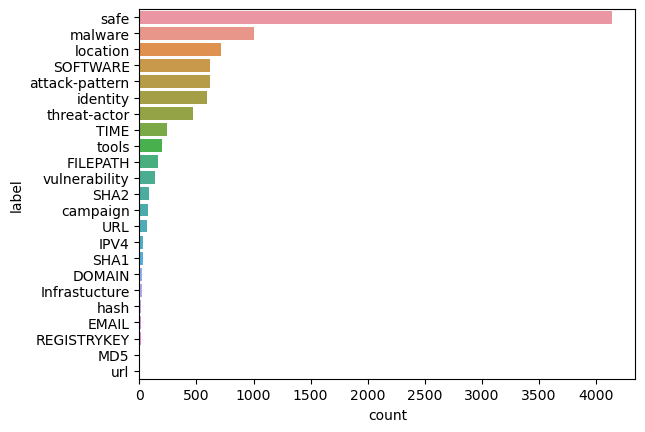

In [34]:
ax = sns.barplot(data = label_df, x='label', y='index')
ax.set(xlabel='count', ylabel='label')

Based on the chart above, majority of the data is safe. There are around 1200 instances of malware, around 750 instances of attack-pattern, and around 600 instances of threat-actor.

In [35]:
sample_text = activity['text'][3]
sample_text

' The first known campaign was launched by Crimeware on November 2014.'

In [36]:
activity.dtypes

text     object
label    object
dtype: object

Counting the number of words in the text data

In [37]:
def Get_WordCount(text):
    return len(text.split())

In [38]:
Get_WordCount(sample_text)

11

In [39]:
activity['word_count'] = activity['text'].apply(lambda x: Get_WordCount(x))
activity.head()

C:\Users\veron\AppData\Local\Temp\ipykernel_26324\2142857729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity['word_count'] = activity['text'].apply(lambda x: Get_WordCount(x))


text           label  \
0  This post is also available in:      日本語 (Japa...         malware   
1  The attack vector is very basic and repeats it...  attack-pattern   
2  Once executed by the user the first stage malw...            safe   
3   The first known campaign was launched by Crim...            TIME   
4  The first stage downloaded the ransomware from...            safe   

   word_count  
0          55  
1          22  
2          20  
3          11  
4           9

In [40]:
Total_word_count = activity['word_count'].sum()
print('Total Number of Words = ', Total_word_count)

Total Number of Words =  187768


In [41]:
avg_word_count = activity['word_count'].mean()
print('Average Number of Words = ', round(avg_word_count, 2))

Average Number of Words =  20.26


In [42]:
activity.describe()

word_count
count  9269.000000
mean     20.257633
std      14.459955
min       1.000000
25%      12.000000
50%      18.000000
75%      26.000000
max     490.000000

In [43]:
activity[activity['word_count'] == 490].iloc[0,1]

'tools'

The word with the most word count is 'tools'

<Axes: ylabel='Frequency'>

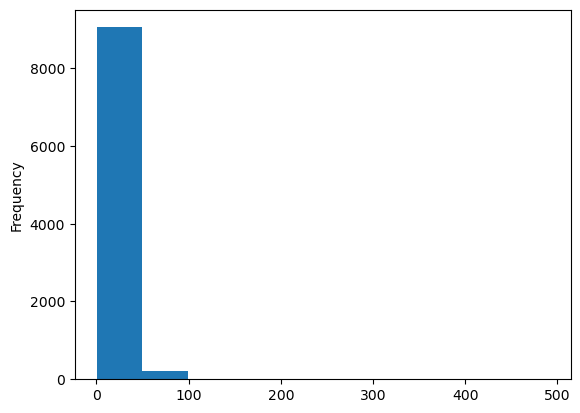

In [44]:
activity.word_count.plot(kind = 'hist')

<Axes: ylabel='Density'>

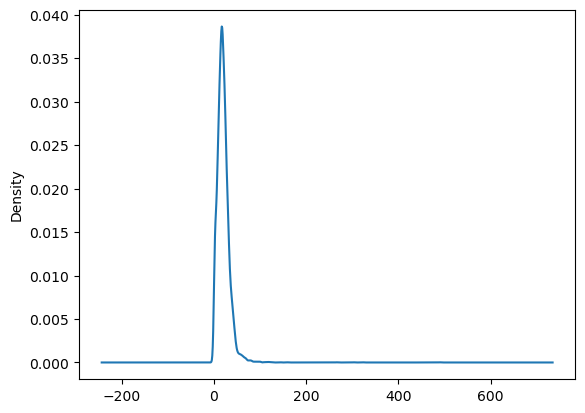

In [45]:
activity.word_count.plot(kind = 'kde')

The word count is between 1 - 100 with majority of the data having fewer word count

<Axes: >

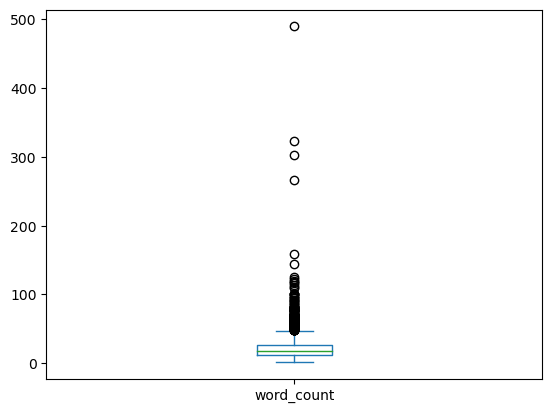

In [46]:
activity['word_count'].plot(kind = 'box')

There are some outliers in the data with very high word count

#### Top 5 longest word count:

In [47]:
activity.sort_values(['word_count'], ascending=False).head(5)

text         label  \
8111  Administrative Office of the President, Afghan...         tools   
3252   Command  Behavior  Compress_Files  Compresses...      FILEPATH   
3410  systemsetting.exe  BIOPASS RAT binary (PyInsta...       malware   
5795  Indicators of Compromise  Indicator  Descripti...  threat-actor   
2667   Several adversarial techniques were observed ...      identity   

      word_count  
8111         490  
3252         323  
3410         303  
5795         266  
2667         159

#### Top 5 shortest word count:

In [48]:
activity.sort_values(['word_count'], ascending=True).head(5)

text    label  word_count
5505    StealthWorker     safe           1
3366      flash.exe    malware           1
2360    ScrambleCross  malware           1
3377  Win64.BIOPASS.A  malware           1
7727           Buffer     safe           1

We can also check the character count

In [49]:
def Get_char_count(text):
    return len(text)

In [50]:
Get_char_count(sample_text)

69

In [51]:
activity['char_length'] = activity['text'].apply(lambda x: Get_char_count(x))

C:\Users\veron\AppData\Local\Temp\ipykernel_26324\1616069763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity['char_length'] = activity['text'].apply(lambda x: Get_char_count(x))


In [52]:
activity.head()

text           label  \
0  This post is also available in:      日本語 (Japa...         malware   
1  The attack vector is very basic and repeats it...  attack-pattern   
2  Once executed by the user the first stage malw...            safe   
3   The first known campaign was launched by Crim...            TIME   
4  The first stage downloaded the ransomware from...            safe   

   word_count  char_length  
0          55          354  
1          22          132  
2          20          123  
3          11           69  
4           9           59

In [53]:
activity['char_length'].describe()

count    9269.000000
mean      140.108642
std       153.258854
min         3.000000
25%        79.000000
50%       121.000000
75%       172.000000
max      5006.000000
Name: char_length, dtype: float64

<Axes: ylabel='Frequency'>

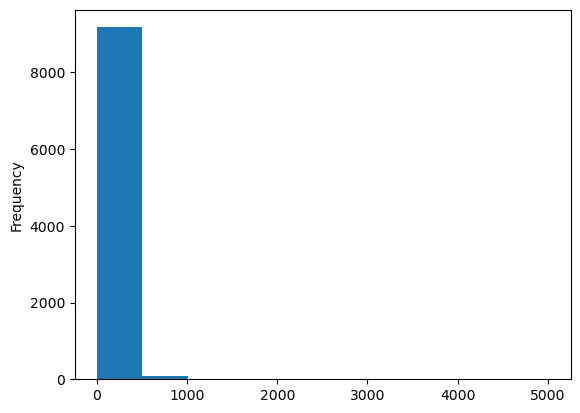

In [54]:
activity['char_length'].plot(kind = 'hist')

The histograph shows similar results as the word count

Listing the word count and character count in a DataFrame for side by side comparison

In [55]:
activity.groupby(['label'])[['word_count', 'char_length']].mean().reset_index().sort_values(['word_count'], ascending=False)

label  word_count  char_length
16        location   27.693390   199.960619
22   vulnerability   26.814815   185.348148
21             url   26.750000   178.250000
6      REGISTRYKEY   26.400000   225.800000
19    threat-actor   25.444206   177.510730
3             IPV4   25.322581   233.387097
20           tools   24.631841   172.427861
15        identity   24.121417   158.956155
9         SOFTWARE   23.659711   151.707865
2         FILEPATH   23.648148   195.777778
13        campaign   23.211268   152.704225
4    Infrastucture   22.666667   147.291667
12  attack-pattern   22.544571   154.936791
10            TIME   22.481633   141.016327
17         malware   20.938185   149.745763
7             SHA1   20.900000   426.133333
14            hash   19.461538   258.153846
0           DOMAIN   19.400000   140.160000
8             SHA2   18.862500   352.412500
5              MD5   17.750000   276.375000
1            EMAIL   17.000000   145.166667
18            safe   16.167150   102.702415
11             URL   13.169231   180.046154

Preprocessing the data to do the following:

* Remove brackets
* Remove punctuation
* Convert text to lowercase
* Remove foreign language
* Tokenize the text
* Remove stop words
* Lemmatize the text

In [56]:
def tokenize_text(text):
    
    text = re.sub(r'[\[\](){}<>]', '', text)
    
    text = re.sub(r'\d+', '', text)
    
    text = re.sub(r'[^\w\s]', '', text)
    
    text = text.lower()
    
    lang, _ = langid.classify(text)
    
    if lang == 'en':
    
        tokens = word_tokenize(text)
        print("Tokens:", tokens)
    
        stop_words = set(stopwords.words('english'))
    
        punctuations = set(string.punctuation)
    
    
        filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word not in punctuations]
        print("Filtered Tokens:", filtered_tokens)
    
        lemmatizer = WordNetLemmatizer()
        lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
        print("Lemmatized Tokens:", lemmatized_tokens)
    
        tokenize_text = ' '.join(lemmatized_tokens)
    
        return tokenize_text
    else:
        return ''

In [57]:
activity['tokenize_text'] = activity['text'].apply(tokenize_text)

Tokens: ['this', 'post', 'is', 'also', 'available', 'in', '日本語', 'japanese', 'ctblocker', 'is', 'a', 'wellknown', 'ransomware', 'trojan', 'used', 'by', 'crimeware', 'groups', 'to', 'encrypt', 'files', 'on', 'the', 'victims', 'endpoints', 'and', 'demand', 'ransom', 'payment', 'to', 'decrypt', 'the', 'files', 'back', 'to', 'their', 'original', 'state', 'but', 'most', 'antiviruses', 'detect', 'it', 'by', 'mistake', 'as', 'cryptolocker', 'only', 'one', 'vendor', 'correctly', 'detects', 'it', 'as', 'ctblocker']
Filtered Tokens: ['post', 'also', 'available', '日本語', 'japanese', 'ctblocker', 'wellknown', 'ransomware', 'trojan', 'used', 'crimeware', 'groups', 'encrypt', 'files', 'victims', 'endpoints', 'demand', 'ransom', 'payment', 'decrypt', 'files', 'back', 'original', 'state', 'antiviruses', 'detect', 'mistake', 'cryptolocker', 'one', 'vendor', 'correctly', 'detects', 'ctblocker']
Lemmatized Tokens: ['post', 'also', 'available', '日本語', 'japanese', 'ctblocker', 'wellknown', 'ransomware', 'tr

Tokens: ['additionally', 'you', 'should', 'practice', 'good', 'cybersecurity', 'hygiene']
Filtered Tokens: ['additionally', 'practice', 'good', 'cybersecurity', 'hygiene']
Lemmatized Tokens: ['additionally', 'practice', 'good', 'cybersecurity', 'hygiene']
Tokens: ['this', 'means', 'avoiding', 'unfamiliar', 'websites', 'clicking', 'on', 'links', 'or', 'downloading', 'attachments', 'from', 'unknown', 'email', 'senders', 'keeping', 'products', 'updated', 'with', 'the', 'latest', 'security', 'patches', 'enabling', 'multifactor', 'authentication', 'and', 'using', 'reputable', 'security', 'products']
Filtered Tokens: ['means', 'avoiding', 'unfamiliar', 'websites', 'clicking', 'links', 'downloading', 'attachments', 'unknown', 'email', 'senders', 'keeping', 'products', 'updated', 'latest', 'security', 'patches', 'enabling', 'multifactor', 'authentication', 'using', 'reputable', 'security', 'products']
Lemmatized Tokens: ['mean', 'avoiding', 'unfamiliar', 'website', 'clicking', 'link', 'downloa

Filtered Tokens: ['example', 'detected', 'two', 'domains', 'distributing', 'malicious', 'binary', 'one', 'domain', 'impersonating', 'popular', 'widely', 'used', 'video', 'conferencing', 'application', 'widely', 'used', 'internet', 'browser']
Lemmatized Tokens: ['example', 'detected', 'two', 'domain', 'distributing', 'malicious', 'binary', 'one', 'domain', 'impersonating', 'popular', 'widely', 'used', 'video', 'conferencing', 'application', 'widely', 'used', 'internet', 'browser']
Tokens: ['our', 'teams', 'at', 'palo', 'alto', 'networks', 'will', 'continue', 'to', 'monitor', 'and', 'work', 'to', 'protect', 'our', 'customers', 'against', 'such', 'attacks']
Filtered Tokens: ['teams', 'palo', 'alto', 'networks', 'continue', 'monitor', 'work', 'protect', 'customers', 'attacks']
Lemmatized Tokens: ['team', 'palo', 'alto', 'network', 'continue', 'monitor', 'work', 'protect', 'customer', 'attack']
Tokens: ['consistent', 'with', 'our', 'previous', 'reporting', 'on', 'the', 'situation', 'unit', 

Tokens: ['in', 'order', 'to', 'confirm', 'the', 'assumption', 'that', 'the', 'above', 'activity', 'is', 'related', 'to', 'cve', 'we', 'looked', 'into', 'the', 'confluence', 'apache', 'access', 'logs', 'atlassianconfluencelog', 'and', 'found', 'the', 'powershell', 'execution', 'the', 'cortex', 'managed', 'threat', 'hunting', 'team', 'continues', 'to', 'track', 'any', 'attempts', 'to', 'exploit', 'cve', 'across', 'our', 'customers', 'using', 'cortex', 'xdr', 'and', 'the', 'xql', 'queries', 'below']
Filtered Tokens: ['order', 'confirm', 'assumption', 'activity', 'related', 'cve', 'looked', 'confluence', 'apache', 'access', 'logs', 'atlassianconfluencelog', 'found', 'powershell', 'execution', 'cortex', 'managed', 'threat', 'hunting', 'team', 'continues', 'track', 'attempts', 'exploit', 'cve', 'across', 'customers', 'using', 'cortex', 'xdr', 'xql', 'queries']
Lemmatized Tokens: ['order', 'confirm', 'assumption', 'activity', 'related', 'cve', 'looked', 'confluence', 'apache', 'access', 'log'

Tokens: ['one', 'example', 'is', 'an', 'exploit', 'rtf', 'that', 'led', 'to', 'downloading', 'and', 'installing', 'makop', 'ransomware', 'remotely']
Filtered Tokens: ['one', 'example', 'exploit', 'rtf', 'led', 'downloading', 'installing', 'makop', 'ransomware', 'remotely']
Lemmatized Tokens: ['one', 'example', 'exploit', 'rtf', 'led', 'downloading', 'installing', 'makop', 'ransomware', 'remotely']
Tokens: ['besides', 'encrypting', 'files', 'on', 'infected', 'hosts', 'the', 'main', 'feature', 'of', 'ransomware', 'is', 'of', 'course', 'the', 'demand', 'for', 'ransom']
Filtered Tokens: ['besides', 'encrypting', 'files', 'infected', 'hosts', 'main', 'feature', 'ransomware', 'course', 'demand', 'ransom']
Lemmatized Tokens: ['besides', 'encrypting', 'file', 'infected', 'host', 'main', 'feature', 'ransomware', 'course', 'demand', 'ransom']
Tokens: ['since', 'ransomware', 'threat', 'actors', 'have', 'had', 'years', 'to', 'evolve', 'their', 'techniques', 'there', 'are', 'now', 'several', 'diffe

Tokens: ['despite', 'these', 'measures', 'users', 'still', 'choose', 'to', 'open', 'these', 'files', 'and', 'enable', 'their', 'content', 'thus', 'allowing', 'macros', 'to', 'continue', 'be', 'a', 'common', 'attack', 'vector', 'both', 'in', 'wide', 'and', 'simple', 'attacks', 'to', 'deliver', 'ransomware', 'such', 'as', 'emotet', 'as', 'well', 'as', 'for', 'sophisticated', 'attacks', 'like', 'this', 'sofacy', 'campaign']
Filtered Tokens: ['despite', 'measures', 'users', 'still', 'choose', 'open', 'files', 'enable', 'content', 'thus', 'allowing', 'macros', 'continue', 'common', 'attack', 'vector', 'wide', 'simple', 'attacks', 'deliver', 'ransomware', 'emotet', 'well', 'sophisticated', 'attacks', 'like', 'sofacy', 'campaign']
Lemmatized Tokens: ['despite', 'measure', 'user', 'still', 'choose', 'open', 'file', 'enable', 'content', 'thus', 'allowing', 'macro', 'continue', 'common', 'attack', 'vector', 'wide', 'simple', 'attack', 'deliver', 'ransomware', 'emotet', 'well', 'sophisticated', '

Filtered Tokens: ['researcher', 'tal', 'beery', 'released', 'blog', 'titled', 'win', 'crypto', 'vulnerability', 'cheating', 'elliptic', 'curve', 'billiard', 'fantastic', 'job', 'explaining', 'bug']
Lemmatized Tokens: ['researcher', 'tal', 'beery', 'released', 'blog', 'titled', 'win', 'crypto', 'vulnerability', 'cheating', 'elliptic', 'curve', 'billiard', 'fantastic', 'job', 'explaining', 'bug']
Tokens: ['the', 'patch', 'provided', 'by', 'microsoft', 'included', 'the', 'typical', 'release', 'of', 'operating', 'system', 'patches', 'but', 'this', 'time', 'a', 'new', 'application', 'programming', 'interface', 'api', 'function', 'was', 'added']
Filtered Tokens: ['patch', 'provided', 'microsoft', 'included', 'typical', 'release', 'operating', 'system', 'patches', 'time', 'new', 'application', 'programming', 'interface', 'api', 'function', 'added']
Lemmatized Tokens: ['patch', 'provided', 'microsoft', 'included', 'typical', 'release', 'operating', 'system', 'patch', 'time', 'new', 'applicatio

Tokens: ['based', 'on', 'our', 'data', 'the', 'version', 'that', 'contains', 'the', 'sms', 'stealing', 'functions', 'is', 'newer', 'and', 'was', 'released', 'around', 'august']
Filtered Tokens: ['based', 'data', 'version', 'contains', 'sms', 'stealing', 'functions', 'newer', 'released', 'around', 'august']
Lemmatized Tokens: ['based', 'data', 'version', 'contains', 'sm', 'stealing', 'function', 'newer', 'released', 'around', 'august']
Tokens: ['apps', 'that', 'use', 'earlier', 'versions', 'of', 'the', 'library', 'appear', 'to', 'be', 'safe']
Filtered Tokens: ['apps', 'use', 'earlier', 'versions', 'library', 'appear', 'safe']
Lemmatized Tokens: ['apps', 'use', 'earlier', 'version', 'library', 'appear', 'safe']
Tokens: ['the', 'taomike', 'library', 'is', 'called', 'zdtpay', 'and', 'is', 'a', 'component', 'of', 'taomikes', 'iap', 'system', 'because', 'android', 'apps', 'are', 'required', 'to', 'list', 'the', 'permissions', 'they', 'need', 'in', 'their', 'manifest', 'file', 'we', 'can', 's

Tokens: ['naively', 'what', 'you', 'need', 'to', 'do', 'is', 'read', 'the', 'cookie', 'file', 'in', 'add', 'your', 'data', 'to', 'what', 'youve', 'read', 'and', 'write', 'the', 'file', 'back', 'to', 'disk']
Filtered Tokens: ['naively', 'need', 'read', 'cookie', 'file', 'add', 'data', 'youve', 'read', 'write', 'file', 'back', 'disk']
Lemmatized Tokens: ['naively', 'need', 'read', 'cookie', 'file', 'add', 'data', 'youve', 'read', 'write', 'file', 'back', 'disk']
Tokens: ['but', 'what', 'if', 'ie', 'is', 'running', 'and', 'also', 'updating', 'that', 'file']
Filtered Tokens: ['ie', 'running', 'also', 'updating', 'file']
Lemmatized Tokens: ['ie', 'running', 'also', 'updating', 'file']
Tokens: ['the', 'worst', 'case', 'for', 'you', 'is', 'that', 'both', 'you', 'and', 'ie', 'read', 'the', 'file', 'at', 'the', 'same', 'time', 'but', 'you', 'write', 'your', 'edits', 'first']
Filtered Tokens: ['worst', 'case', 'ie', 'read', 'file', 'time', 'write', 'edits', 'first']
Lemmatized Tokens: ['worst', 

Tokens: ['an', 'interesting', 'observation', 'is', 'that', 'half', 'of', 'these', 'iap', 'sdks', 'implement', 'the', 'send', 'and', 'block', 'sms', 'functions', 'in', 'separate', 'codes']
Filtered Tokens: ['interesting', 'observation', 'half', 'iap', 'sdks', 'implement', 'send', 'block', 'sms', 'functions', 'separate', 'codes']
Lemmatized Tokens: ['interesting', 'observation', 'half', 'iap', 'sdks', 'implement', 'send', 'block', 'sm', 'function', 'separate', 'code']
Tokens: ['more', 'specifically', 'the', 'code', 'was', 'separated', 'into', 'two', 'parts']
Filtered Tokens: ['specifically', 'code', 'separated', 'two', 'parts']
Lemmatized Tokens: ['specifically', 'code', 'separated', 'two', 'part']
Tokens: ['one', 'piece', 'is', 'embedded', 'into', 'android', 'apps', 'or', 'games', 'for', 'developers', 'as', 'a', 'part', 'of', 'the', 'source', 'code']
Filtered Tokens: ['one', 'piece', 'embedded', 'android', 'apps', 'games', 'developers', 'part', 'source', 'code']
Lemmatized Tokens: ['one

Filtered Tokens: ['following', 'line', 'code', 'attempts', 'validate', 'inbound', 'password', 'reset', 'request', 'comparing', 'reset', 'code', 'submitted', 'within', 'http', 'request', 'reset', 'code', 'generated', 'octobercms', 'legitimate', 'reset', 'process', 'exploit', 'vulnerability', 'actor', 'would', 'simply', 'supply', 'boolean', 'true', 'value', 'reset', 'code', 'within', 'customcrafted', 'http', 'request', 'reset', 'password', 'account']
Lemmatized Tokens: ['following', 'line', 'code', 'attempt', 'validate', 'inbound', 'password', 'reset', 'request', 'comparing', 'reset', 'code', 'submitted', 'within', 'http', 'request', 'reset', 'code', 'generated', 'octobercms', 'legitimate', 'reset', 'process', 'exploit', 'vulnerability', 'actor', 'would', 'simply', 'supply', 'boolean', 'true', 'value', 'reset', 'code', 'within', 'customcrafted', 'http', 'request', 'reset', 'password', 'account']
Tokens: ['by', 'supplying', 'the', 'boolean', 'true', 'the', 'comparison', 'between', 'boolea

Tokens: ['the', 'terms', 'remote', 'administration', 'tool', 'rat', 'and', 'trojan', 'downloader', 'are', 'often', 'used', 'synonymously', 'with', 'such', 'implants']
Filtered Tokens: ['terms', 'remote', 'administration', 'tool', 'rat', 'trojan', 'downloader', 'often', 'used', 'synonymously', 'implants']
Lemmatized Tokens: ['term', 'remote', 'administration', 'tool', 'rat', 'trojan', 'downloader', 'often', 'used', 'synonymously', 'implant']
Tokens: ['once', 'installed', 'ie', 'implanted', 'on', 'a', 'system', 'the', 'modern', 'backdoor', 'typically', 'offers', 'much', 'more', 'than', 'simple', 'ie', 'command', 'line', 'access', 'to', 'a', 'system']
Filtered Tokens: ['installed', 'ie', 'implanted', 'system', 'modern', 'backdoor', 'typically', 'offers', 'much', 'simple', 'ie', 'command', 'line', 'access', 'system']
Lemmatized Tokens: ['installed', 'ie', 'implanted', 'system', 'modern', 'backdoor', 'typically', 'offer', 'much', 'simple', 'ie', 'command', 'line', 'access', 'system']
Tokens

Filtered Tokens: ['two', 'developers', 'produced', 'five', 'applications', 'weve', 'found', 'every', 'one', 'contains', 'funtasy', 'trojan']
Lemmatized Tokens: ['two', 'developer', 'produced', 'five', 'application', 'weve', 'found', 'every', 'one', 'contains', 'funtasy', 'trojan']
Tokens: ['while', 'the', 'name', 'oscar', 'sanchez', 'may', 'be', 'a', 'pseudonym']
Filtered Tokens: ['name', 'oscar', 'sanchez', 'may', 'pseudonym']
Lemmatized Tokens: ['name', 'oscar', 'sanchez', 'may', 'pseudonym']
Tokens: ['whois', 'data', 'indicates', 'it', 'was', 'also', 'used', 'to', 'register', 'the', 'domain', 'hosting', 'the', 'funtasy', 'mobile', 'premium', 'sms', 'service']
Filtered Tokens: ['whois', 'data', 'indicates', 'also', 'used', 'register', 'domain', 'hosting', 'funtasy', 'mobile', 'premium', 'sms', 'service']
Lemmatized Tokens: ['whois', 'data', 'indicates', 'also', 'used', 'register', 'domain', 'hosting', 'funtasy', 'mobile', 'premium', 'sm', 'service']
Tokens: ['in', 'total', 'weve', 'f

Filtered Tokens: ['went', 'even', 'three', 'vulnerabilities', 'useafterfree', 'bugs']
Lemmatized Tokens: ['went', 'even', 'three', 'vulnerability', 'useafterfree', 'bug']
Tokens: ['the', 'three', 'vulnerabilities', 'each', 'contain', 'code', 'to', 'alter', 'a', 'usercontrolled', 'address', 'and', 'the', 'code', 'can', 'be', 'distilled', 'down', 'to', 'the', 'following', 'operations']
Filtered Tokens: ['three', 'vulnerabilities', 'contain', 'code', 'alter', 'usercontrolled', 'address', 'code', 'distilled', 'following', 'operations']
Lemmatized Tokens: ['three', 'vulnerability', 'contain', 'code', 'alter', 'usercontrolled', 'address', 'code', 'distilled', 'following', 'operation']
Tokens: ['here', 'xyz', 'indicates', 'a', 'usercontrolled', 'address', 'that', 'contains', 'the', 'length', 'of', 'a', 'vector', 'object', 'or', 'length', 'of', 'an', 'intarray']
Filtered Tokens: ['xyz', 'indicates', 'usercontrolled', 'address', 'contains', 'length', 'vector', 'object', 'length', 'intarray']
Le

Tokens: ['the', 'download', 'links', 'were', 'also', 'replaced', 'to', 'download', 'the', 'malicious', 'android', 'application', 'instead']
Filtered Tokens: ['download', 'links', 'also', 'replaced', 'download', 'malicious', 'android', 'application', 'instead']
Lemmatized Tokens: ['download', 'link', 'also', 'replaced', 'download', 'malicious', 'android', 'application', 'instead']
Tokens: ['original', 'top', 'and', 'modified', 'bottom', 'website']
Filtered Tokens: ['original', 'top', 'modified', 'bottom', 'website']
Lemmatized Tokens: ['original', 'top', 'modified', 'bottom', 'website']
Tokens: ['upon', 'writing', 'this', 'entry', 'weve', 'coordinated', 'with', 'google', 'to', 'ensure', 'that', 'the', 'malicious', 'applications', 'these', 'cc', 'sites', 'advertise', 'are', 'no', 'longer', 'available', 'for', 'download', 'on', 'the', 'google', 'play', 'store']
Filtered Tokens: ['upon', 'writing', 'entry', 'weve', 'coordinated', 'google', 'ensure', 'malicious', 'applications', 'cc', 'site

Tokens: ['the', 'second', 'packer', 'we', 'discovered', 'consists', 'of', 'two', 'layers', 'with', 'the', 'second', 'being', 'the', 'custom', 'upx', 'packer', 'discussed', 'above']
Filtered Tokens: ['second', 'packer', 'discovered', 'consists', 'two', 'layers', 'second', 'custom', 'upx', 'packer', 'discussed']
Lemmatized Tokens: ['second', 'packer', 'discovered', 'consists', 'two', 'layer', 'second', 'custom', 'upx', 'packer', 'discussed']
Tokens: ['this', 'particular', 'packer', 'seems', 'to', 'be', 'more', 'common', 'on', 'x', 'binaries', 'and', 'involves', 'decrypting', 'embedded', 'blobs', 'using', 'a', 'seemingly', 'custom', 'algorithm', 'containing', 'unconventional', 'instructions', 'such', 'as', 'xlat', 'figure', 'aside', 'from', 'storing', 'the', 'encrypted', 'second', 'layer', 'there', 'is', 'little', 'to', 'no', 'obfuscation', 'within', 'the', 'packer', 'api', 'calls', 'such', 'as', 'virtualalloc', 'and', 'virtualprotect', 'are', 'clearly', 'visible', 'and', 'there', 'is', '

Tokens: ['with', 'this', 'addition', 'protection', 'available', 'our', 'customers', 'can', 'and', 'should', 'include', 'that', 'as', 'part', 'of', 'their', 'decisions', 'around', 'security', 'and', 'deployment', 'of', 'the', 'security', 'updates', 'and', 'their', 'risk', 'assessment', 'of', 'the', 'vulnerability', 'and', 'threat', 'environment']
Filtered Tokens: ['addition', 'protection', 'available', 'customers', 'include', 'part', 'decisions', 'around', 'security', 'deployment', 'security', 'updates', 'risk', 'assessment', 'vulnerability', 'threat', 'environment']
Lemmatized Tokens: ['addition', 'protection', 'available', 'customer', 'include', 'part', 'decision', 'around', 'security', 'deployment', 'security', 'update', 'risk', 'assessment', 'vulnerability', 'threat', 'environment']
Tokens: ['as', 'always', 'we', 'are', 'monitoring', 'the', 'situation', 'closely', 'and', 'will', 'provide', 'additional', 'details', 'as', 'they', 'become', 'available', 'sign', 'up', 'to', 'receive', '

Tokens: ['we', 'believe', 'this', 'action', 'will', 'have', 'a', 'significant', 'impact', 'on', 'gluptebas', 'operations']
Filtered Tokens: ['believe', 'action', 'significant', 'impact', 'gluptebas', 'operations']
Lemmatized Tokens: ['believe', 'action', 'significant', 'impact', 'gluptebas', 'operation']
Tokens: ['however', 'the', 'operators', 'of', 'glupteba', 'are', 'likely', 'to', 'attempt', 'to', 'regain', 'control', 'of', 'the', 'botnet', 'using', 'a', 'backup', 'command', 'and', 'control', 'mechanism', 'that', 'uses', 'data', 'encoded', 'on', 'the', 'bitcoin', 'blockchain']
Filtered Tokens: ['however', 'operators', 'glupteba', 'likely', 'attempt', 'regain', 'control', 'botnet', 'using', 'backup', 'command', 'control', 'mechanism', 'uses', 'data', 'encoded', 'bitcoin', 'blockchain']
Lemmatized Tokens: ['however', 'operator', 'glupteba', 'likely', 'attempt', 'regain', 'control', 'botnet', 'using', 'backup', 'command', 'control', 'mechanism', 'us', 'data', 'encoded', 'bitcoin', 'blo

Tokens: ['for', 'more', 'details', 'about', 'earth', 'bakus', 'new', 'campaign', 'read', 'our', 'research', 'paper', 'earth', 'baku', 'an', 'apt', 'group', 'targeting', 'indopacific', 'countries', 'with', 'new', 'stealth', 'loaders', 'and', 'backdoor', 'tags', 'articles', 'news', 'reports', 'apt', 'targeted', 'attacks', 'research']
Filtered Tokens: ['details', 'earth', 'bakus', 'new', 'campaign', 'read', 'research', 'paper', 'earth', 'baku', 'apt', 'group', 'targeting', 'indopacific', 'countries', 'new', 'stealth', 'loaders', 'backdoor', 'tags', 'articles', 'news', 'reports', 'apt', 'targeted', 'attacks', 'research']
Lemmatized Tokens: ['detail', 'earth', 'baku', 'new', 'campaign', 'read', 'research', 'paper', 'earth', 'baku', 'apt', 'group', 'targeting', 'indopacific', 'country', 'new', 'stealth', 'loader', 'backdoor', 'tag', 'article', 'news', 'report', 'apt', 'targeted', 'attack', 'research']
Tokens: ['this', 'post', 'is', 'also', 'available', 'in', '日本語', 'japanese', 'recently', 't

Tokens: ['such', 'gangs', 'obtain', 'their', 'foothold', 'in', 'the', 'networks', 'of', 'their', 'victims', 'by', 'purchasing', 'access', 'from', 'other', 'threat', 'actors', 'who', 'sell', 'it', 'as', 'a', 'commodity']
Filtered Tokens: ['gangs', 'obtain', 'foothold', 'networks', 'victims', 'purchasing', 'access', 'threat', 'actors', 'sell', 'commodity']
Lemmatized Tokens: ['gang', 'obtain', 'foothold', 'network', 'victim', 'purchasing', 'access', 'threat', 'actor', 'sell', 'commodity']
Tokens: ['they', 'can', 'also', 'procure', 'infrastructure', 'malware', 'communications', 'tools', 'and', 'money', 'laundering', 'from', 'other', 'raas', 'providers']
Filtered Tokens: ['also', 'procure', 'infrastructure', 'malware', 'communications', 'tools', 'money', 'laundering', 'raas', 'providers']
Lemmatized Tokens: ['also', 'procure', 'infrastructure', 'malware', 'communication', 'tool', 'money', 'laundering', 'raas', 'provider']
Tokens: ['most', 'of', 'these', 'actors', 'use', 'the', 'same', 'met

Tokens: ['lockbit', 'targets', 'organizations', 'opportunistically']
Filtered Tokens: ['lockbit', 'targets', 'organizations', 'opportunistically']
Lemmatized Tokens: ['lockbit', 'target', 'organization', 'opportunistically']
Tokens: ['the', 'operators', 'work', 'with', 'initial', 'access', 'brokers', 'to', 'save', 'time', 'and', 'allow', 'for', 'a', 'larger', 'profit', 'potential']
Filtered Tokens: ['operators', 'work', 'initial', 'access', 'brokers', 'save', 'time', 'allow', 'larger', 'profit', 'potential']
Lemmatized Tokens: ['operator', 'work', 'initial', 'access', 'broker', 'save', 'time', 'allow', 'larger', 'profit', 'potential']
Tokens: ['while', 'typically', 'seeking', 'victims', 'of', 'opportunity', 'lockbit', 'does', 'appear', 'to', 'have', 'victim', 'limitations']
Filtered Tokens: ['typically', 'seeking', 'victims', 'opportunity', 'lockbit', 'appear', 'victim', 'limitations']
Lemmatized Tokens: ['typically', 'seeking', 'victim', 'opportunity', 'lockbit', 'appear', 'victim', '

Filtered Tokens: ['research', 'shows', 'isnt', 'isolated', 'event']
Lemmatized Tokens: ['research', 'show', 'isnt', 'isolated', 'event']
Tokens: ['our', 'researchers', 'analyzed', 'over', 'of', 'sites', 'and', 'what', 'they', 'found', 'was', 'very', 'telling']
Filtered Tokens: ['researchers', 'analyzed', 'sites', 'found', 'telling']
Lemmatized Tokens: ['researcher', 'analyzed', 'site', 'found', 'telling']
Tokens: ['the', 'good', 'news', 'is', 'that', 'these', 'attacks', 'are', 'more', 'like', 'denial', 'of', 'service', 'attacks', 'they', 'dont', 'do', 'lasting', 'harm', 'to', 'your', 'system', 'and', 'they', 'end', 'when', 'you', 'leave', 'the', 'site', 'the', 'bad', 'news', 'is', 'that', 'these', 'are', 'harder', 'to', 'defend', 'against', 'than', 'typical', 'driveby', 'download', 'attacks']
Filtered Tokens: ['good', 'news', 'attacks', 'like', 'denial', 'service', 'attacks', 'dont', 'lasting', 'harm', 'system', 'end', 'leave', 'site', 'bad', 'news', 'harder', 'defend', 'typical', 'dri

Tokens: ['first', 'this', 'is', 'a', 'young', 'campaign']
Filtered Tokens: ['first', 'young', 'campaign']
Lemmatized Tokens: ['first', 'young', 'campaign']
Tokens: ['our', 'research', 'shows', 'this', 'operation', 'to', 'be', 'only', 'about', 'four', 'months', 'old']
Filtered Tokens: ['research', 'shows', 'operation', 'four', 'months', 'old']
Lemmatized Tokens: ['research', 'show', 'operation', 'four', 'month', 'old']
Tokens: ['second', 'this', 'is', 'a', 'very', 'large', 'campaign']
Filtered Tokens: ['second', 'large', 'campaign']
Lemmatized Tokens: ['second', 'large', 'campaign']
Tokens: ['our', 'researchers', 'can', 'show', 'that', 'about', 'onehalf', 'of', 'the', 'samples', 'we', 'found', 'have', 'affected', 'million', 'people', 'worldwide']
Filtered Tokens: ['researchers', 'show', 'onehalf', 'samples', 'found', 'affected', 'million', 'people', 'worldwide']
Lemmatized Tokens: ['researcher', 'show', 'onehalf', 'sample', 'found', 'affected', 'million', 'people', 'worldwide']
Tokens: 

Filtered Tokens: ['user', 'clicks', 'update', 'full', 'protection', 'button', 'prompted', 'subscribe', 'service', 'costs', 'us', 'per', 'month', 'inapp', 'purchase', 'google', 'play', 'figure', 'figure']
Lemmatized Tokens: ['user', 'click', 'update', 'full', 'protection', 'button', 'prompted', 'subscribe', 'service', 'cost', 'u', 'per', 'month', 'inapp', 'purchase', 'google', 'play', 'figure', 'figure']
Tokens: ['the', 'app', 'requests', 'that', 'the', 'user', 'pay', 'per', 'month', 'for', 'full', 'protection']
Filtered Tokens: ['app', 'requests', 'user', 'pay', 'per', 'month', 'full', 'protection']
Lemmatized Tokens: ['app', 'request', 'user', 'pay', 'per', 'month', 'full', 'protection']
Tokens: ['through', 'analyzing', 'the', 'apps', 'code', 'we', 'discovered', 'a', 'multiple', 'indications', 'that', 'this', 'program', 'was', 'not', 'a', 'legitimate', 'antivirus', 'program', 'but', 'actually', 'scareware']
Filtered Tokens: ['analyzing', 'apps', 'code', 'discovered', 'multiple', 'indi

Tokens: ['antivm', 'checks', 'in', 'sample', 'cfabcfbeddbbbbfddadbcaebdcffa', 'figure']
Filtered Tokens: ['antivm', 'checks', 'sample', 'cfabcfbeddbbbbfddadbcaebdcffa', 'figure']
Lemmatized Tokens: ['antivm', 'check', 'sample', 'cfabcfbeddbbbbfddadbcaebdcffa', 'figure']
Tokens: ['check', 'for', 'zhcnpreferred', 'ui', 'language', 'in', 'sample', 'cbceddfdbaafcdcfaedfcedfecc']
Filtered Tokens: ['check', 'zhcnpreferred', 'ui', 'language', 'sample', 'cbceddfdbaafcdcfaedfcedfecc']
Lemmatized Tokens: ['check', 'zhcnpreferred', 'ui', 'language', 'sample', 'cbceddfdbaafcdcfaedfcedfecc']
Tokens: ['the', 'legitimate', 'known', 'application', 'is', 'downloaded', 'and', 'executed']
Filtered Tokens: ['legitimate', 'known', 'application', 'downloaded', 'executed']
Lemmatized Tokens: ['legitimate', 'known', 'application', 'downloaded', 'executed']
Tokens: ['authenticodesigned', 'files', 'are', 'either', 'downloaded', 'from', 'the', 'official', 'websites', 'as', 'seen', 'in', 'sample', 'cfabcfbeddbbbb

Tokens: ['figure']
Filtered Tokens: ['figure']
Lemmatized Tokens: ['figure']
Tokens: ['a', 'predefined', 'list', 'of', 'memory', 'offset', 'intended', 'to', 'grab', 'information', 'from', 'different', 'versions', 'of', 'wechat', 'figure']
Filtered Tokens: ['predefined', 'list', 'memory', 'offset', 'intended', 'grab', 'information', 'different', 'versions', 'wechat', 'figure']
Lemmatized Tokens: ['predefined', 'list', 'memory', 'offset', 'intended', 'grab', 'information', 'different', 'version', 'wechat', 'figure']
Tokens: ['the', 'script', 'used', 'to', 'exfiltrate', 'wechat', 'chat', 'database', 'files', 'the', 'other', 'plugin', 'xss_spoof', 'is', 'an', 'archive', 'that', 'contains', 'multiple', 'python', 'scripts']
Filtered Tokens: ['script', 'used', 'exfiltrate', 'wechat', 'chat', 'database', 'files', 'plugin', 'xss_spoof', 'archive', 'contains', 'multiple', 'python', 'scripts']
Lemmatized Tokens: ['script', 'used', 'exfiltrate', 'wechat', 'chat', 'database', 'file', 'plugin', 'xss

Tokens: ['in', 'blackgears', 'previous', 'campaigns', 'protuxs', 'configuration', 'format', 'had', 'to', 'be', 'changed', 'to', 'another', 'version']
Filtered Tokens: ['blackgears', 'previous', 'campaigns', 'protuxs', 'configuration', 'format', 'changed', 'another', 'version']
Lemmatized Tokens: ['blackgears', 'previous', 'campaign', 'protuxs', 'configuration', 'format', 'changed', 'another', 'version']
Tokens: ['for', 'instance', 'protuxs', 'older', 'iteration', 'will', 'look', 'for', 'the', 'a', 'tag', 'as', 'shown', 'in', 'figure']
Filtered Tokens: ['instance', 'protuxs', 'older', 'iteration', 'look', 'tag', 'shown', 'figure']
Lemmatized Tokens: ['instance', 'protuxs', 'older', 'iteration', 'look', 'tag', 'shown', 'figure']
Tokens: ['the', 'format', 'used', 'by', 'protuxs', 'latest', 'version', 'is', 'now', 'similar', 'to', 'marades', 'as', 'shown', 'in', 'figure']
Filtered Tokens: ['format', 'used', 'protuxs', 'latest', 'version', 'similar', 'marades', 'shown', 'figure']
Lemmatized

Filtered Tokens: ['spear', 'phishing', 'specific', 'attack', 'technique', 'become', 'widely', 'used', 'past', 'years']
Lemmatized Tokens: ['spear', 'phishing', 'specific', 'attack', 'technique', 'become', 'widely', 'used', 'past', 'year']
Tokens: ['in', 'our', 'new', 'research', 'blog', 'freemilk', 'a', 'highly', 'targeted', 'spear', 'phishing', 'campaign', 'our', 'unit', 'research', 'team', 'has', 'discovered', 'an', 'attack', 'campaign', 'that', 'takes', 'spear', 'phishing', 'targeting', 'to', 'the', 'next', 'level', 'by', 'hijacking', 'inprogress', 'email', 'conversations']
Filtered Tokens: ['new', 'research', 'blog', 'freemilk', 'highly', 'targeted', 'spear', 'phishing', 'campaign', 'unit', 'research', 'team', 'discovered', 'attack', 'campaign', 'takes', 'spear', 'phishing', 'targeting', 'next', 'level', 'hijacking', 'inprogress', 'email', 'conversations']
Lemmatized Tokens: ['new', 'research', 'blog', 'freemilk', 'highly', 'targeted', 'spear', 'phishing', 'campaign', 'unit', 'rese

Tokens: ['cve', 'a', 'remote', 'code', 'execution', 'rce', 'vulnerability', 'due', 'to', 'serverside', 'template', 'injection', 'in', 'vmware', 'workspace', 'one', 'access', 'and', 'identity', 'manager', 'is', 'trivial', 'to', 'exploit', 'with', 'a', 'single', 'http', 'request', 'to', 'a', 'vulnerable', 'device']
Filtered Tokens: ['cve', 'remote', 'code', 'execution', 'rce', 'vulnerability', 'due', 'serverside', 'template', 'injection', 'vmware', 'workspace', 'one', 'access', 'identity', 'manager', 'trivial', 'exploit', 'single', 'http', 'request', 'vulnerable', 'device']
Lemmatized Tokens: ['cve', 'remote', 'code', 'execution', 'rce', 'vulnerability', 'due', 'serverside', 'template', 'injection', 'vmware', 'workspace', 'one', 'access', 'identity', 'manager', 'trivial', 'exploit', 'single', 'http', 'request', 'vulnerable', 'device']
Tokens: ['the', 'list', 'below', 'details', 'the', 'exploits', 'unit', 'observed', 'targeting', 'this', 'vulnerability', 'that', 'we', 'deemed', 'worth', '

Filtered Tokens: ['also', 'identifies', 'dependencies', 'enterprises', 'ot', 'systems', 'give', 'attackers', 'path']
Lemmatized Tokens: ['also', 'identifies', 'dependency', 'enterprise', 'ot', 'system', 'give', 'attacker', 'path']
Tokens: ['lastly', 'the', 'document', 'thoroughly', 'explains', 'how', 'to', 'decrease', 'the', 'risk', 'of', 'severe', 'business', 'degradation', 'if', 'affected', 'by', 'a', 'ransomware', 'attack']
Filtered Tokens: ['lastly', 'document', 'thoroughly', 'explains', 'decrease', 'risk', 'severe', 'business', 'degradation', 'affected', 'ransomware', 'attack']
Lemmatized Tokens: ['lastly', 'document', 'thoroughly', 'explains', 'decrease', 'risk', 'severe', 'business', 'degradation', 'affected', 'ransomware', 'attack']
Tokens: ['to', 'prepare', 'for', 'ransomware', 'attacks', 'cisa', 'recommends', 'enterprises', 'determine', 'their', 'critical', 'operational', 'processes', 'reliance', 'on', 'key', 'it', 'infrastructure', 'and', 'identify', 'a', 'resilience', 'plan

Filtered Tokens: ['july', 'noticed', 'interesting', 'activity', 'coming', 'group', 'closely', 'monitoring', 'since']
Lemmatized Tokens: ['july', 'noticed', 'interesting', 'activity', 'coming', 'group', 'closely', 'monitoring', 'since']
Tokens: ['the', 'actors', 'seem', 'to', 'be', 'targeting', 'organizations', 'in', 'the', 'transportation', 'industry', 'and', 'government', 'agencies', 'related', 'to', 'transport']
Filtered Tokens: ['actors', 'seem', 'targeting', 'organizations', 'transportation', 'industry', 'government', 'agencies', 'related', 'transport']
Lemmatized Tokens: ['actor', 'seem', 'targeting', 'organization', 'transportation', 'industry', 'government', 'agency', 'related', 'transport']
Tokens: ['we', 'observed', 'that', 'the', 'group', 'tried', 'to', 'access', 'some', 'internal', 'documents', 'such', 'as', 'flight', 'schedules', 'and', 'documents', 'for', 'financial', 'plans', 'and', 'personal', 'information', 'on', 'the', 'compromised', 'hosts', 'such', 'as', 'search', 'h

Tokens: ['it', 'also', 'provides', 'an', 'easy', 'and', 'effective', 'way', 'of', 'copying', 'data', 'to', 'several', 'cloud', 'storage', 'providers']
Filtered Tokens: ['also', 'provides', 'easy', 'effective', 'way', 'copying', 'data', 'several', 'cloud', 'storage', 'providers']
Lemmatized Tokens: ['also', 'provides', 'easy', 'effective', 'way', 'copying', 'data', 'several', 'cloud', 'storage', 'provider']
Tokens: ['cwindowssystemwindowspowershellvpowershellexe', 'command', 'newobject', 'systemnetwebclientdownloadfilehttprcloneexe', 'rexe']
Filtered Tokens: ['cwindowssystemwindowspowershellvpowershellexe', 'command', 'newobject', 'systemnetwebclientdownloadfilehttprcloneexe', 'rexe']
Lemmatized Tokens: ['cwindowssystemwindowspowershellvpowershellexe', 'command', 'newobject', 'systemnetwebclientdownloadfilehttprcloneexe', 'rexe']
Tokens: ['based', 'on', 'previous', 'experience', 'rclone', 'has', 'frequently', 'been', 'used', 'in', 'ransomware', 'attacks', 'to', 'exfiltrate', 'stolen', '

Tokens: ['threat', 'actors', 'are', 'notorious', 'for', 'creating', 'stealthy', 'malware', 'that', 'can', 'bypass', 'superficial', 'network', 'monitoring']
Filtered Tokens: ['threat', 'actors', 'notorious', 'creating', 'stealthy', 'malware', 'bypass', 'superficial', 'network', 'monitoring']
Lemmatized Tokens: ['threat', 'actor', 'notorious', 'creating', 'stealthy', 'malware', 'bypass', 'superficial', 'network', 'monitoring']
Tokens: ['a', 'more', 'proactive', 'stance', 'that', 'includes', 'proper', 'application', 'of', 'firewalls', 'and', 'intrusion', 'detection', 'and', 'prevention', 'systems', 'can', 'help', 'mitigate', 'the', 'impact', 'of', 'an', 'attack', 'implement', 'network', 'segmentation']
Filtered Tokens: ['proactive', 'stance', 'includes', 'proper', 'application', 'firewalls', 'intrusion', 'detection', 'prevention', 'systems', 'help', 'mitigate', 'impact', 'attack', 'implement', 'network', 'segmentation']
Lemmatized Tokens: ['proactive', 'stance', 'includes', 'proper', 'app

Tokens: ['catch', 'exception', 'bool', 'hasexited', 'processhasexited', 'if', 'hasexited', 'flag', 'true']
Filtered Tokens: ['catch', 'exception', 'bool', 'hasexited', 'processhasexited', 'hasexited', 'flag', 'true']
Lemmatized Tokens: ['catch', 'exception', 'bool', 'hasexited', 'processhasexited', 'hasexited', 'flag', 'true']
Tokens: ['pipecommunicationclose']
Filtered Tokens: ['pipecommunicationclose']
Lemmatized Tokens: ['pipecommunicationclose']
Tokens: ['tag', 'is', 'committed', 'to', 'sharing', 'research', 'to', 'raise', 'awareness', 'on', 'bad', 'actors', 'like', 'charming', 'kitten', 'within', 'the', 'security', 'community', 'and', 'for', 'companies', 'and', 'individuals', 'that', 'may', 'be', 'targeted']
Filtered Tokens: ['tag', 'committed', 'sharing', 'research', 'raise', 'awareness', 'bad', 'actors', 'like', 'charming', 'kitten', 'within', 'security', 'community', 'companies', 'individuals', 'may', 'targeted']
Lemmatized Tokens: ['tag', 'committed', 'sharing', 'research', 'r

Tokens: ['the', 'list', 'of', 'target', 'websites', 'for', 'the', 'app', 'can', 'be', 'seen', 'in', 'the', 'cyberchef', 'recipe', 'here']
Filtered Tokens: ['list', 'target', 'websites', 'app', 'seen', 'cyberchef', 'recipe']
Lemmatized Tokens: ['list', 'target', 'website', 'app', 'seen', 'cyberchef', 'recipe']
Tokens: ['during', 'our', 'investigation', 'into', 'the', 'turla', 'cyberazov', 'apps', 'we', 'identified', 'another', 'android', 'app', 'first', 'seen', 'in', 'the', 'wild', 'in', 'march', 'that', 'also', 'claimed', 'to', 'conduct', 'dos', 'attacks', 'against', 'russian', 'websites']
Filtered Tokens: ['investigation', 'turla', 'cyberazov', 'apps', 'identified', 'another', 'android', 'app', 'first', 'seen', 'wild', 'march', 'also', 'claimed', 'conduct', 'dos', 'attacks', 'russian', 'websites']
Lemmatized Tokens: ['investigation', 'turla', 'cyberazov', 'apps', 'identified', 'another', 'android', 'app', 'first', 'seen', 'wild', 'march', 'also', 'claimed', 'conduct', 'do', 'attack', 

Tokens: ['based', 'on', 'our', 'research', 'and', 'findings', 'we', 'assessed', 'this', 'to', 'be', 'one', 'of', 'the', 'most', 'technically', 'sophisticated', 'exploits', 'we', 'had', 'ever', 'seen', 'further', 'demonstrating', 'that', 'the', 'capabilities', 'nso', 'provides', 'rival', 'those', 'previously', 'thought', 'to', 'be', 'accessible', 'to', 'only', 'a', 'handful', 'of', 'nation', 'states']
Filtered Tokens: ['based', 'research', 'findings', 'assessed', 'one', 'technically', 'sophisticated', 'exploits', 'ever', 'seen', 'demonstrating', 'capabilities', 'nso', 'provides', 'rival', 'previously', 'thought', 'accessible', 'handful', 'nation', 'states']
Lemmatized Tokens: ['based', 'research', 'finding', 'assessed', 'one', 'technically', 'sophisticated', 'exploit', 'ever', 'seen', 'demonstrating', 'capability', 'nso', 'provides', 'rival', 'previously', 'thought', 'accessible', 'handful', 'nation', 'state']
Tokens: ['although', 'this', 'committee', 'must', 'be', 'concerned', 'with', 

Tokens: ['the', 'actors', 'behind', 'this', 'campaign', 'which', 'we', 'attribute', 'to', 'a', 'group', 'of', 'hackers', 'recruited', 'in', 'a', 'russianspeaking', 'forum', 'lure', 'their', 'target', 'with', 'fake', 'collaboration', 'opportunities', 'typically', 'a', 'demo', 'for', 'antivirus', 'software', 'vpn', 'music', 'players', 'photo', 'editing', 'or', 'online', 'games', 'hijack', 'their', 'channel', 'then', 'either', 'sell', 'it', 'to', 'the', 'highest', 'bidder', 'or', 'use', 'it', 'to', 'broadcast', 'cryptocurrency', 'scams']
Filtered Tokens: ['actors', 'behind', 'campaign', 'attribute', 'group', 'hackers', 'recruited', 'russianspeaking', 'forum', 'lure', 'target', 'fake', 'collaboration', 'opportunities', 'typically', 'demo', 'antivirus', 'software', 'vpn', 'music', 'players', 'photo', 'editing', 'online', 'games', 'hijack', 'channel', 'either', 'sell', 'highest', 'bidder', 'use', 'broadcast', 'cryptocurrency', 'scams']
Lemmatized Tokens: ['actor', 'behind', 'campaign', 'attr

Filtered Tokens: ['similar', 'recently', 'observed', 'activity', 'campaigns', 'sent', 'via', 'email', 'contained', 'unique', 'link', 'per', 'target', 'led', 'docx', 'file', 'hosted', 'attacker', 'controlled', 'infrastructure']
Lemmatized Tokens: ['similar', 'recently', 'observed', 'activity', 'campaign', 'sent', 'via', 'email', 'contained', 'unique', 'link', 'per', 'target', 'led', 'docx', 'file', 'hosted', 'attacker', 'controlled', 'infrastructure']
Tokens: ['when', 'opened', 'the', 'docx', 'file', 'would', 'attempt', 'to', 'download', 'a', 'unique', 'png', 'file', 'from', 'the', 'same', 'attacker', 'controlled', 'domain']
Filtered Tokens: ['opened', 'docx', 'file', 'would', 'attempt', 'download', 'unique', 'png', 'file', 'attacker', 'controlled', 'domain']
Lemmatized Tokens: ['opened', 'docx', 'file', 'would', 'attempt', 'download', 'unique', 'png', 'file', 'attacker', 'controlled', 'domain']
Tokens: ['recently', 'observed', 'turla', 'domains', 'coldriver', 'a', 'russianbased', 'thre

Tokens: ['this', 'is', 'how', 'they', 'attack', 'our', 'organizations']
Filtered Tokens: ['attack', 'organizations']
Lemmatized Tokens: ['attack', 'organization']
Tokens: ['we', 'know', 'that', 'because', 'of', 'the', 'average', 'time', 'to', 'detect', 'a', 'breach', 'is', 'around', 'days', 'right', 'now', 'and', 'that', 'stat', 'has', 'fluctuated', 'maybe', 'plus', 'or', 'minus', 'days', 'for', 'the', 'last', 'decade']
Filtered Tokens: ['know', 'average', 'time', 'detect', 'breach', 'around', 'days', 'right', 'stat', 'fluctuated', 'maybe', 'plus', 'minus', 'days', 'last', 'decade']
Lemmatized Tokens: ['know', 'average', 'time', 'detect', 'breach', 'around', 'day', 'right', 'stat', 'fluctuated', 'maybe', 'plus', 'minus', 'day', 'last', 'decade']
Tokens: ['we', 'also', 'know', 'that', 'it', 'takes', 'almost', 'threeit', 'takes', 'two', 'and', 'a', 'half', 'to', 'three', 'months', 'actually', 'contain', 'a', 'breach', 'once', 'you', 'discover', 'it', 'and', 'the', 'reason', 'for', 'all',

Tokens: ['we', 'acquired', 'a', 'variant', 'of', 'the', 'cyclops', 'blink', 'malware', 'family', 'that', 'targets', 'asus', 'routers']
Filtered Tokens: ['acquired', 'variant', 'cyclops', 'blink', 'malware', 'family', 'targets', 'asus', 'routers']
Lemmatized Tokens: ['acquired', 'variant', 'cyclops', 'blink', 'malware', 'family', 'target', 'asus', 'router']
Tokens: ['this', 'report', 'discusses', 'the', 'technical', 'capabilities', 'of', 'this', 'cyclops', 'blink', 'malware', 'variant', 'and', 'includes', 'a', 'list', 'of', 'more', 'than', 'current', 'and', 'historical', 'commandandcontrol', 'cc', 'servers', 'of', 'the', 'cyclops', 'blink', 'botnet']
Filtered Tokens: ['report', 'discusses', 'technical', 'capabilities', 'cyclops', 'blink', 'malware', 'variant', 'includes', 'list', 'current', 'historical', 'commandandcontrol', 'cc', 'servers', 'cyclops', 'blink', 'botnet']
Lemmatized Tokens: ['report', 'discus', 'technical', 'capability', 'cyclops', 'blink', 'malware', 'variant', 'include

Tokens: ['in', 'the', 'case', 'of', 'cyclops', 'blink', 'we', 'received', 'samples', 'targeting', 'asus', 'routers', 'that', 'were', 'not', 'previously', 'reported', 'on']
Filtered Tokens: ['case', 'cyclops', 'blink', 'received', 'samples', 'targeting', 'asus', 'routers', 'previously', 'reported']
Lemmatized Tokens: ['case', 'cyclops', 'blink', 'received', 'sample', 'targeting', 'asus', 'router', 'previously', 'reported']
Tokens: ['the', 'asus', 'version', 'of', 'the', 'cyclops', 'blink', 'malware', 'that', 'we', 'have', 'analyzed', 'showed', 'some', 'differences', 'compared', 'to', 'the', 'watchguard', 'versions', 'that', 'have', 'been', 'previously', 'discussed']
Filtered Tokens: ['asus', 'version', 'cyclops', 'blink', 'malware', 'analyzed', 'showed', 'differences', 'compared', 'watchguard', 'versions', 'previously', 'discussed']
Lemmatized Tokens: ['asus', 'version', 'cyclops', 'blink', 'malware', 'analyzed', 'showed', 'difference', 'compared', 'watchguard', 'version', 'previously',

Tokens: ['unfortunately', 'theres', 'nothing', 'obvious', 'that', 'differentiates', 'a', 'website', 'infected', 'with', 'magecart', 'from', 'any', 'other', 'site']
Filtered Tokens: ['unfortunately', 'theres', 'nothing', 'obvious', 'differentiates', 'website', 'infected', 'magecart', 'site']
Lemmatized Tokens: ['unfortunately', 'there', 'nothing', 'obvious', 'differentiates', 'website', 'infected', 'magecart', 'site']
Tokens: ['it', 'will', 'look', 'completely', 'normal', 'and', 'will', 'allow', 'you', 'to', 'pay', 'in', 'the', 'usual', 'manner']
Filtered Tokens: ['look', 'completely', 'normal', 'allow', 'pay', 'usual', 'manner']
Lemmatized Tokens: ['look', 'completely', 'normal', 'allow', 'pay', 'usual', 'manner']
Tokens: ['the', 'only', 'difference', 'is', 'that', 'in', 'the', 'background', 'a', 'tiny', 'piece', 'of', 'code', 'will', 'be', 'stealing', 'your', 'data', 'and', 'transferring', 'it', 'to', 'the', 'hackers']
Filtered Tokens: ['difference', 'background', 'tiny', 'piece', 'co

Tokens: ['obviously', 'this', 'is', 'where', 'our', 'focus', 'needs', 'to', 'be', 'hands', 'down']
Filtered Tokens: ['obviously', 'focus', 'needs', 'hands']
Lemmatized Tokens: ['obviously', 'focus', 'need', 'hand']
Tokens: ['these', 'are', 'the', 'things', 'that', 'i', 'think', 'countries', 'across', 'the', 'globe', 'need', 'to', 'understand', 'especially', 'here', 'in', 'western', 'countries', 'and', 'especially', 'nato', 'countries', 'understanding', 'that', 'they', 'need', 'to', 'be', 'shoring', 'up', 'and', 'almost', 'like', 'dhs', 'says', 'in', 'their', 'program', 'shields', 'up', 'is', 'really', 'focused', 'on', 'being', 'proactive', 'and', 'protecting', 'those', 'critical', 'sectors']
Filtered Tokens: ['things', 'think', 'countries', 'across', 'globe', 'need', 'understand', 'especially', 'western', 'countries', 'especially', 'nato', 'countries', 'understanding', 'need', 'shoring', 'almost', 'like', 'dhs', 'says', 'program', 'shields', 'really', 'focused', 'proactive', 'protectin

Filtered Tokens: ['query', 'format', 'used', 'trigger', 'xss', 'vulnerability', 'service', 'worker', 'script', 'exploitation']
Lemmatized Tokens: ['query', 'format', 'used', 'trigger', 'x', 'vulnerability', 'service', 'worker', 'script', 'exploitation']
Tokens: ['by', 'examining', 'one', 'of', 'the', 'malicious', 'scripts', 'from', 'the', 'earth', 'wendigo', 'campaign', 'we', 'discovered', 'that', 'it', 'uploaded', 'the', 'tampered', 'service', 'worker', 'script', 'to', 'the', 'webmail', 'server', 'disguised', 'as', 'an', 'original', 'script', 'provided', 'by', 'the', 'server']
Filtered Tokens: ['examining', 'one', 'malicious', 'scripts', 'earth', 'wendigo', 'campaign', 'discovered', 'uploaded', 'tampered', 'service', 'worker', 'script', 'webmail', 'server', 'disguised', 'original', 'script', 'provided', 'server']
Lemmatized Tokens: ['examining', 'one', 'malicious', 'script', 'earth', 'wendigo', 'campaign', 'discovered', 'uploaded', 'tampered', 'service', 'worker', 'script', 'webmail',

Tokens: ['browser', 'is', 'a', 'tool', 'that', 'extracts', 'credentials', 'from', 'the', 'following', 'applications', 'chrome', 'chromium', 'firefox', 'opera', 'internet', 'explorer', 'outlook', 'figure']
Filtered Tokens: ['browser', 'tool', 'extracts', 'credentials', 'following', 'applications', 'chrome', 'chromium', 'firefox', 'opera', 'internet', 'explorer', 'outlook', 'figure']
Lemmatized Tokens: ['browser', 'tool', 'extract', 'credential', 'following', 'application', 'chrome', 'chromium', 'firefox', 'opera', 'internet', 'explorer', 'outlook', 'figure']
Tokens: ['usage', 'example', 'of', 'browserexe', 'following', 'the', 'use', 'of', 'browserexe', 'we', 'observed', 'the', 'following', 'command', 'being', 'executed', 'powershellexe']
Filtered Tokens: ['usage', 'example', 'browserexe', 'following', 'use', 'browserexe', 'observed', 'following', 'command', 'executed', 'powershellexe']
Lemmatized Tokens: ['usage', 'example', 'browserexe', 'following', 'use', 'browserexe', 'observed', 'f

Tokens: ['figure', 'code', 'for', 'downloading', 'the', 'document', 'template', 'with', 'the', 'malicious', 'macro']
Filtered Tokens: ['figure', 'code', 'downloading', 'document', 'template', 'malicious', 'macro']
Lemmatized Tokens: ['figure', 'code', 'downloading', 'document', 'template', 'malicious', 'macro']
Tokens: ['as', 'mentioned', 'the', 'template', 'contains', 'malicious', 'macro', 'mitre', 'attck', 'framework', 'id', 't', 'which', 'exports', 'vbs', 'mitre', 'attck', 'framework', 'id', 't', 'to', 'execute', 'itself']
Filtered Tokens: ['mentioned', 'template', 'contains', 'malicious', 'macro', 'mitre', 'attck', 'framework', 'id', 'exports', 'vbs', 'mitre', 'attck', 'framework', 'id', 'execute']
Lemmatized Tokens: ['mentioned', 'template', 'contains', 'malicious', 'macro', 'mitre', 'attck', 'framework', 'id', 'export', 'vbs', 'mitre', 'attck', 'framework', 'id', 'execute']
Tokens: ['this', 'particular', 'behavior', 'is', 'a', 'slight', 'departure', 'from', 'previously', 'reporte

Filtered Tokens: ['version', 'weve', 'analyzed', 'installer', 'writes', 'token', 'registry', 'key']
Lemmatized Tokens: ['version', 'weve', 'analyzed', 'installer', 'writes', 'token', 'registry', 'key']
Tokens: ['pandora', 'backdoor', 'samples', 'with', 'different', 'tokens', 'based', 'on', 'our', 'analysis', 'the', 'pandora', 'backdoor', 'contains', 'more', 'public', 'code', 'repositories', 'compared', 'with', 'previous', 'versions']
Filtered Tokens: ['pandora', 'backdoor', 'samples', 'different', 'tokens', 'based', 'analysis', 'pandora', 'backdoor', 'contains', 'public', 'code', 'repositories', 'compared', 'previous', 'versions']
Lemmatized Tokens: ['pandora', 'backdoor', 'sample', 'different', 'token', 'based', 'analysis', 'pandora', 'backdoor', 'contains', 'public', 'code', 'repository', 'compared', 'previous', 'version']
Tokens: ['feature', 'name', 'repository', 'driver', 'memory', 'injection', 'blackbone', 'httpsgithubcomdarthtonblackbone', 'ndis', 'network', 'filtering', 'driver'

Filtered Tokens: ['kit', 'found', 'tgz', 'format', 'though', 'observed', 'samples', 'disguised', 'png', 'jpg']
Lemmatized Tokens: ['kit', 'found', 'tgz', 'format', 'though', 'observed', 'sample', 'disguised', 'png', 'jpg']
Tokens: ['the', 'tsm', 'binary', 'then', 'runs', 'in', 'the', 'background', 'forwarding', 'a', 'series', 'of', 'error', 'messages', 'to', 'devnull', 'to', 'keep', 'the', 'code', 'running', 'ensuring', 'the', 'continuous', 'execution', 'of', 'the', 'code', 'referenced', 'with', 'a', 'set', 'of', 'parameters', 'tmpuptxt']
Filtered Tokens: ['tsm', 'binary', 'runs', 'background', 'forwarding', 'series', 'error', 'messages', 'devnull', 'keep', 'code', 'running', 'ensuring', 'continuous', 'execution', 'code', 'referenced', 'set', 'parameters', 'tmpuptxt']
Lemmatized Tokens: ['tsm', 'binary', 'run', 'background', 'forwarding', 'series', 'error', 'message', 'devnull', 'keep', 'code', 'running', 'ensuring', 'continuous', 'execution', 'code', 'referenced', 'set', 'parameter', 

Tokens: ['just', 'like', 'in', 'previous', 'operations', 'they', 'continue', 'to', 'make', 'small', 'changes', 'such', 'as', 'targeting', 'other', 'countries', 'entities', 'or', 'the', 'combination', 'of', 'techniques', 'used', 'for', 'deployment', 'for', 'each', 'campaign']
Filtered Tokens: ['like', 'previous', 'operations', 'continue', 'make', 'small', 'changes', 'targeting', 'countries', 'entities', 'combination', 'techniques', 'used', 'deployment', 'campaign']
Lemmatized Tokens: ['like', 'previous', 'operation', 'continue', 'make', 'small', 'change', 'targeting', 'country', 'entity', 'combination', 'technique', 'used', 'deployment', 'campaign']
Tokens: ['despite', 'the', 'changes', 'ta', 'continues', 'to', 'use', 'either', 'flawedammyy', 'rat', 'remote', 'access', 'trojan', 'or', 'servhelper', 'as', 'payloads']
Filtered Tokens: ['despite', 'changes', 'ta', 'continues', 'use', 'either', 'flawedammyy', 'rat', 'remote', 'access', 'trojan', 'servhelper', 'payloads']
Lemmatized Tokens: 

Tokens: ['the', 'phishing', 'kit', 'will', 'also', 'ask', 'for', 'secondfactor', 'authentication', 'codes', 'sent', 'to', 'devices']
Filtered Tokens: ['phishing', 'kit', 'also', 'ask', 'secondfactor', 'authentication', 'codes', 'sent', 'devices']
Lemmatized Tokens: ['phishing', 'kit', 'also', 'ask', 'secondfactor', 'authentication', 'code', 'sent', 'device']
Tokens: ['apt', 'has', 'relied', 'on', 'this', 'technique', 'since', 'targeting', 'highvalue', 'accounts', 'in', 'government', 'academia', 'journalism', 'ngos', 'foreign', 'policy', 'and', 'national', 'security']
Filtered Tokens: ['apt', 'relied', 'technique', 'since', 'targeting', 'highvalue', 'accounts', 'government', 'academia', 'journalism', 'ngos', 'foreign', 'policy', 'national', 'security']
Lemmatized Tokens: ['apt', 'relied', 'technique', 'since', 'targeting', 'highvalue', 'account', 'government', 'academia', 'journalism', 'ngo', 'foreign', 'policy', 'national', 'security']
Tokens: ['credential', 'phishing', 'through', 'a',

Filtered Tokens: ['attacker', 'logged', 'victims', 'account', 'hyperscrape', 'checks', 'see', 'language', 'set', 'english', 'changing']
Lemmatized Tokens: ['attacker', 'logged', 'victim', 'account', 'hyperscrape', 'check', 'see', 'language', 'set', 'english', 'changing']
Tokens: ['hyperscrape', 'then', 'begins', 'iterating', 'through', 'all', 'available', 'tabs', 'in', 'the', 'inbox', 'looking', 'for', 'emails', 'to', 'download']
Filtered Tokens: ['hyperscrape', 'begins', 'iterating', 'available', 'tabs', 'inbox', 'looking', 'emails', 'download']
Lemmatized Tokens: ['hyperscrape', 'begin', 'iterating', 'available', 'tab', 'inbox', 'looking', 'email', 'download']
Tokens: ['post', 'httpckeyguidcrcidentifier', 'appname', 'gmail', 'downloader', 'targetname', 'email', 'hostname', 'redacted', 'srcuserip', 'redacted', 'actiontype', 'first', 'timeoccurrence', 'pm', 'os', 'redacted', 'osversion', 'redacted', 'systemmodel', 'redacted', 'systemtype', 'redacted', 'srcname', 'redacted', 'srcorgname

Tokens: ['evasion']
Filtered Tokens: ['evasion']
Lemmatized Tokens: ['evasion']
Tokens: ['the', 'image', 'file', 'of', 'the', 'process', 'residing', 'in', 'the', 'windows', 'directory', 'that', 'triggered', 'the', 'schtasks', 'command', 'was', 'marked', 'as', 'normal']
Filtered Tokens: ['image', 'file', 'process', 'residing', 'windows', 'directory', 'triggered', 'schtasks', 'command', 'marked', 'normal']
Lemmatized Tokens: ['image', 'file', 'process', 'residing', 'window', 'directory', 'triggered', 'schtasks', 'command', 'marked', 'normal']
Tokens: ['plugx', 'and', 'malicious', 'blobs']
Filtered Tokens: ['plugx', 'malicious', 'blobs']
Lemmatized Tokens: ['plugx', 'malicious', 'blob']
Tokens: ['reversing', 'the', 'file', 'revealed', 'that', 'it', 'was', 'the', 'plugx', 'loader', 'a', 'remote', 'access', 'tool', 'rat', 'that', 'has', 'been', 'historically', 'used', 'in', 'attacks', 'targeting', 'governmentrelated', 'industries', 'and', 'organizations']
Filtered Tokens: ['reversing', 'fil

Tokens: ['womanhitru', 'figure']
Filtered Tokens: ['womanhitru', 'figure']
Lemmatized Tokens: ['womanhitru', 'figure']
Tokens: ['lurks', 'intermediate', 'targets', 'by', 'year', 'to']
Filtered Tokens: ['lurks', 'intermediate', 'targets', 'year']
Lemmatized Tokens: ['lurks', 'intermediate', 'target', 'year']
Tokens: ['going', 'global', 'was', 'a', 'significant', 'year', 'in', 'lurks', 'history']
Filtered Tokens: ['going', 'global', 'significant', 'year', 'lurks', 'history']
Lemmatized Tokens: ['going', 'global', 'significant', 'year', 'lurks', 'history']
Tokens: ['why', 'not', 'go', 'global', 'to', 'turn', 'in', 'more', 'profit']
Filtered Tokens: ['go', 'global', 'turn', 'profit']
Lemmatized Tokens: ['go', 'global', 'turn', 'profit']
Tokens: ['by', 'the', 'second', 'half', 'of', 'the', 'year', 'lurks', 'geographical', 'distribution', 'drastically', 'changed']
Filtered Tokens: ['second', 'half', 'year', 'lurks', 'geographical', 'distribution', 'drastically', 'changed']
Lemmatized Tokens:

Tokens: ['we', 'obtained', 'orat', 'samples', 'that', 'register', 'these', 'routes', 'get', 'agentinfo', 'get', 'agentping', 'post', 'agentupload', 'get', 'agentdownload', 'get', 'agentscreenshot', 'get', 'agentzip', 'get', 'agentunzip', 'get', 'agentkillself', 'get', 'agentportscan', 'get', 'agentproxy', 'get', 'agentssh', 'get', 'agentnet', 'puppetdownloaders', 'c', 'downloaders']
Filtered Tokens: ['obtained', 'orat', 'samples', 'register', 'routes', 'get', 'agentinfo', 'get', 'agentping', 'post', 'agentupload', 'get', 'agentdownload', 'get', 'agentscreenshot', 'get', 'agentzip', 'get', 'agentunzip', 'get', 'agentkillself', 'get', 'agentportscan', 'get', 'agentproxy', 'get', 'agentssh', 'get', 'agentnet', 'puppetdownloaders', 'c', 'downloaders']
Lemmatized Tokens: ['obtained', 'orat', 'sample', 'register', 'route', 'get', 'agentinfo', 'get', 'agentping', 'post', 'agentupload', 'get', 'agentdownload', 'get', 'agentscreenshot', 'get', 'agentzip', 'get', 'agentunzip', 'get', 'agentkills

Filtered Tokens: ['based', 'language', 'hardcoded', 'samples', 'found', 'tick', 'appeared', 'targeting', 'japanese', 'organizations', 'subsidiaries', 'china', 'serve', 'footholds', 'intrusion', 'tick', 'hardcoded', 'two', 'code', 'pages', 'referring', 'japanese', 'simplified', 'chinese', 'characters', 'respectively']
Lemmatized Tokens: ['based', 'language', 'hardcoded', 'sample', 'found', 'tick', 'appeared', 'targeting', 'japanese', 'organization', 'subsidiary', 'china', 'serve', 'foothold', 'intrusion', 'tick', 'hardcoded', 'two', 'code', 'page', 'referring', 'japanese', 'simplified', 'chinese', 'character', 'respectively']
Tokens: ['figure', 'language', 'code', 'pages']
Filtered Tokens: ['figure', 'language', 'code', 'pages']
Lemmatized Tokens: ['figure', 'language', 'code', 'page']
Tokens: ['malware', 'analysis']
Filtered Tokens: ['malware', 'analysis']
Lemmatized Tokens: ['malware', 'analysis']
Tokens: ['new', 'downloaders', 'and', 'trojans', 'datper', 'while', 'this', 'backdoor', 

Tokens: ['trend', 'micro', 'solutions', 'customers', 'of', 'the', 'trend', 'micro', 'tippingpoint', 'solution', 'are', 'protected', 'from', 'this', 'threat', 'via', 'these', 'mainlinedv', 'filters', 'miner', 'tcp', 'request', 'indicators', 'of', 'compromise', 'iocs', 'file', 'name', 'sha', 'detection', 'rsync', 'dabbdbcbeefbcbaadfae', 'backdoorperlshellbotab', 'ps', 'bbcabdfecfbeedecddbedebdedf', 'backdoorlinuxsshdoorab', 'cron', 'efeccbfdbfefeacdfdecbeeeeefced', 'coinminerlinuxmalxmruwejn', 'anacron', 'bebfebbaaedeffbfaacfdceee', 'tsm', 'cfcefbeeaffedebcaeabddfebae', 'trojanlinuxsshbrutea', 'tsm', 'dffffebbbdacaeaeffdde', 'urls', 'cc', 'for', 'backdoorperlshellbotab', 'cc', 'for', 'backdoorlinuxsshdoorab', 'satan', 'rp', 'hxxpxcache', 'hxxpdotatargz', 'hxxpfiatluxapk', 'apk', 'file', 'hosted', 'on', 'this', 'server', 'hxxpmageignorelistcomdotatargz', 'mageignorelistcom', 'zergbasemooocom', 'tags', 'malware', 'apt', 'targeted', 'attacks', 'endpoints', 'research']
Filtered Tokens: ['tre

Tokens: ['igmtsxexe', 'imap', 'rat']
Filtered Tokens: ['igmtsxexe', 'imap', 'rat']
Lemmatized Tokens: ['igmtsxexe', 'imap', 'rat']
Tokens: ['trojwintrxxxpefff', 'badbaecdfaadbcebacfacafcefdccbbdd', 'emailexe']
Filtered Tokens: ['trojwintrxxxpefff', 'badbaecdfaadbcebacfacafcefdccbbdd', 'emailexe']
Lemmatized Tokens: ['trojwintrxxxpefff', 'badbaecdfaadbcebacfacafcefdccbbdd', 'emailexe']
Tokens: ['trojwintrxxxpefff', 'fafdbeddbeebdbffdfedacd', 'emailexe']
Filtered Tokens: ['trojwintrxxxpefff', 'fafdbeddbeebdbffdfedacd', 'emailexe']
Lemmatized Tokens: ['trojwintrxxxpefff', 'fafdbeddbeebdbffdfedacd', 'emailexe']
Tokens: ['imap', 'rat', 'trojanmsiloceanmapa', 'trojwintrxxxpefff', 'cbdedbdcdbfdafdddfedaf', 'emailexe']
Filtered Tokens: ['imap', 'rat', 'trojanmsiloceanmapa', 'trojwintrxxxpefff', 'cbdedbdcdbfdafdddfedaf', 'emailexe']
Lemmatized Tokens: ['imap', 'rat', 'trojanmsiloceanmapa', 'trojwintrxxxpefff', 'cbdedbdcdbfdafdddfedaf', 'emailexe']
Tokens: ['bdeffeaedcbeeadbfcecbccb', 'emailexe'

Filtered Tokens: ['source', 'apache', 'http', 'server', 'project', 'trend', 'micro', 'inc', 'nvd', 'cve', 'cve', 'two', 'critical', 'vulnerabilities', 'perfect', 'examples', 'attackers', 'exploit', 'vulnerabilities', 'apache', 'http', 'server']
Lemmatized Tokens: ['source', 'apache', 'http', 'server', 'project', 'trend', 'micro', 'inc', 'nvd', 'cve', 'cve', 'two', 'critical', 'vulnerability', 'perfect', 'example', 'attacker', 'exploit', 'vulnerability', 'apache', 'http', 'server']
Tokens: ['as', 'trend', 'micro', 'reported', 'these', 'two', 'are', 'path', 'traversal', 'vulnerabilities', 'that', 'allow', 'attackers', 'to', 'map', 'urls', 'to', 'filesdirectories', 'outside', 'of', 'the', 'webroot']
Filtered Tokens: ['trend', 'micro', 'reported', 'two', 'path', 'traversal', 'vulnerabilities', 'allow', 'attackers', 'map', 'urls', 'filesdirectories', 'outside', 'webroot']
Lemmatized Tokens: ['trend', 'micro', 'reported', 'two', 'path', 'traversal', 'vulnerability', 'allow', 'attacker', 'map

Filtered Tokens: ['terminated', 'youtube', 'channels', 'part', 'ongoing', 'investigation', 'coordinated', 'influence', 'operations', 'linked', 'china']
Lemmatized Tokens: ['terminated', 'youtube', 'channel', 'part', 'ongoing', 'investigation', 'coordinated', 'influence', 'operation', 'linked', 'china']
Tokens: ['this', 'bulletin', 'includes', 'coordinated', 'influence', 'operation', 'campaigns', 'terminated', 'on', 'our', 'platforms', 'in', 'q', 'of']
Filtered Tokens: ['bulletin', 'includes', 'coordinated', 'influence', 'operation', 'campaigns', 'terminated', 'platforms', 'q']
Lemmatized Tokens: ['bulletin', 'includes', 'coordinated', 'influence', 'operation', 'campaign', 'terminated', 'platform', 'q']
Tokens: ['it', 'was', 'last', 'updated', 'on', 'august']
Filtered Tokens: ['last', 'updated', 'august']
Lemmatized Tokens: ['last', 'updated', 'august']
Tokens: ['we', 'terminated', 'youtube', 'channels', 'as', 'part', 'of', 'our', 'ongoing', 'investigation', 'into', 'coordinated', 'infl

Tokens: ['the', 'downloaded', 'rtf', 'files', 'exploit', 'the', 'cve', 'vulnerability']
Filtered Tokens: ['downloaded', 'rtf', 'files', 'exploit', 'cve', 'vulnerability']
Lemmatized Tokens: ['downloaded', 'rtf', 'file', 'exploit', 'cve', 'vulnerability']
Tokens: ['it', 'drops', 'a', 'file', 'named', 'a', 'a', 'javascript', 'code', 'which', 'drops', 'the', 'backdoor', 'stealer', 'into', 'a', 'folder', 'in', 'programdata', 'and', 'directly', 'executes', 'it', 'or', 'creates', 'a', 'scheduled', 'task', 'to', 'execute', 'the', 'dropped', 'files', 'at', 'a', 'later', 'time']
Filtered Tokens: ['drops', 'file', 'named', 'javascript', 'code', 'drops', 'backdoor', 'stealer', 'folder', 'programdata', 'directly', 'executes', 'creates', 'scheduled', 'task', 'execute', 'dropped', 'files', 'later', 'time']
Lemmatized Tokens: ['drop', 'file', 'named', 'javascript', 'code', 'drop', 'backdoor', 'stealer', 'folder', 'programdata', 'directly', 'executes', 'creates', 'scheduled', 'task', 'execute', 'dropp

Filtered Tokens: ['one', 'notable', 'characteristics', 'apt', 'impersonation', 'conference', 'officials', 'conduct', 'phishing', 'attacks']
Lemmatized Tokens: ['one', 'notable', 'characteristic', 'apt', 'impersonation', 'conference', 'official', 'conduct', 'phishing', 'attack']
Tokens: ['when', 'they', 'did', 'attackers', 'sent', 'them', 'phishing', 'links', 'in', 'followon', 'correspondence']
Filtered Tokens: ['attackers', 'sent', 'phishing', 'links', 'followon', 'correspondence']
Lemmatized Tokens: ['attacker', 'sent', 'phishing', 'link', 'followon', 'correspondence']
Tokens: ['targets', 'typically', 'had', 'to', 'navigate', 'through', 'at', 'least', 'one', 'redirect', 'before', 'landing', 'on', 'a', 'phishing', 'domain']
Filtered Tokens: ['targets', 'typically', 'navigate', 'least', 'one', 'redirect', 'landing', 'phishing', 'domain']
Lemmatized Tokens: ['target', 'typically', 'navigate', 'least', 'one', 'redirect', 'landing', 'phishing', 'domain']
Tokens: ['the', 'attackers', 'embed

Tokens: ['figure', 'how', 'plead', 'utilizes', 'compromised', 'routers', 'plead', 'actors', 'use', 'a', 'router', 'scanner', 'tool', 'to', 'scan', 'for', 'vulnerable', 'routers', 'after', 'which', 'the', 'attackers', 'will', 'enable', 'the', 'routers', 'vpn', 'feature', 'then', 'register', 'a', 'machine', 'as', 'virtual', 'server']
Filtered Tokens: ['figure', 'plead', 'utilizes', 'compromised', 'routers', 'plead', 'actors', 'use', 'router', 'scanner', 'tool', 'scan', 'vulnerable', 'routers', 'attackers', 'enable', 'routers', 'vpn', 'feature', 'register', 'machine', 'virtual', 'server']
Lemmatized Tokens: ['figure', 'plead', 'utilizes', 'compromised', 'router', 'plead', 'actor', 'use', 'router', 'scanner', 'tool', 'scan', 'vulnerable', 'router', 'attacker', 'enable', 'router', 'vpn', 'feature', 'register', 'machine', 'virtual', 'server']
Tokens: ['this', 'virtual', 'server', 'will', 'be', 'used', 'either', 'as', 'a', 'cc', 'server', 'or', 'an', 'http', 'server', 'that', 'delivers', 'ple

Filtered Tokens: ['ransomware', 'attack', 'retailer', 'could', 'mean', 'thousands', 'lost', 'sales', 'opportunities', 'shortterm', 'serious', 'damage', 'reputation', 'longterm']
Lemmatized Tokens: ['ransomware', 'attack', 'retailer', 'could', 'mean', 'thousand', 'lost', 'sale', 'opportunity', 'shortterm', 'serious', 'damage', 'reputation', 'longterm']
Tokens: ['perception', 'of', 'an', 'unsafe', 'business', 'could', 'turn', 'customers', 'towards', 'competitors', 'who', 'can', 'offer', 'a', 'better', 'and', 'more', 'secure', 'shopping', 'experience']
Filtered Tokens: ['perception', 'unsafe', 'business', 'could', 'turn', 'customers', 'towards', 'competitors', 'offer', 'better', 'secure', 'shopping', 'experience']
Lemmatized Tokens: ['perception', 'unsafe', 'business', 'could', 'turn', 'customer', 'towards', 'competitor', 'offer', 'better', 'secure', 'shopping', 'experience']
Tokens: ['what', 'are', 'your', 'thoughts', 'on', 'the', 'ransomware', 'attacks', 'on', 'retailers', 'as', 'we', '

Filtered Tokens: ['comparison', 'tclients', 'configuration', 'format', 'left', 'researchers', 'right', 'tclient', 'use', 'ssl', 'connect', 'tropic', 'troopers', 'cc', 'server']
Lemmatized Tokens: ['comparison', 'tclients', 'configuration', 'format', 'left', 'researcher', 'right', 'tclient', 'use', 'ssl', 'connect', 'tropic', 'trooper', 'cc', 'server']
Tokens: ['tclient', 'is', 'actually', 'one', 'of', 'tropic', 'troopers', 'other', 'backdoors']
Filtered Tokens: ['tclient', 'actually', 'one', 'tropic', 'troopers', 'backdoors']
Lemmatized Tokens: ['tclient', 'actually', 'one', 'tropic', 'trooper', 'backdoor']
Tokens: ['tclient', 'uses', 'symmetric', 'encryption', 'to', 'decrypt', 'its', 'configuration', 'with', 'one', 'byte', 'key', 'in']
Filtered Tokens: ['tclient', 'uses', 'symmetric', 'encryption', 'decrypt', 'configuration', 'one', 'byte', 'key']
Lemmatized Tokens: ['tclient', 'us', 'symmetric', 'encryption', 'decrypt', 'configuration', 'one', 'byte', 'key']
Tokens: ['the', 'image', 

Filtered Tokens: ['however', 'since', 'early', 'weve', 'noticed', 'changes', 'water', 'pamolas', 'activity']
Lemmatized Tokens: ['however', 'since', 'early', 'weve', 'noticed', 'change', 'water', 'pamolas', 'activity']
Tokens: ['victims', 'are', 'now', 'mainly', 'located', 'only', 'in', 'japan']
Filtered Tokens: ['victims', 'mainly', 'located', 'japan']
Lemmatized Tokens: ['victim', 'mainly', 'located', 'japan']
Tokens: ['recent', 'telemetry', 'data', 'indicates', 'that', 'the', 'attacks', 'are', 'not', 'being', 'launched', 'via', 'spam', 'anymore']
Filtered Tokens: ['recent', 'telemetry', 'data', 'indicates', 'attacks', 'launched', 'via', 'spam', 'anymore']
Lemmatized Tokens: ['recent', 'telemetry', 'data', 'indicates', 'attack', 'launched', 'via', 'spam', 'anymore']
Tokens: ['instead', 'malicious', 'scripts', 'are', 'being', 'executed', 'when', 'the', 'administrators', 'look', 'into', 'customer', 'orders', 'in', 'their', 'online', 'shops', 'administration', 'panel']
Filtered Tokens: 

Filtered Tokens: ['compromised', 'credentials', 'used', 'successfully', 'log', 'accounts', 'fraudsters', 'identify', 'executives']
Lemmatized Tokens: ['compromised', 'credential', 'used', 'successfully', 'log', 'account', 'fraudsters', 'identify', 'executive']
Tokens: ['they', 'will', 'then', 'send', 'a', 'fraudulent', 'wire', 'transfer', 'request', 'to', 'trick', 'recipients', 'into', 'wiring', 'money', 'into', 'the', 'criminals', 'accounts']
Filtered Tokens: ['send', 'fraudulent', 'wire', 'transfer', 'request', 'trick', 'recipients', 'wiring', 'money', 'criminals', 'accounts']
Lemmatized Tokens: ['send', 'fraudulent', 'wire', 'transfer', 'request', 'trick', 'recipient', 'wiring', 'money', 'criminal', 'account']
Tokens: ['we', 'found', 'a', 'bec', 'mail', 'sample', 'that', 'was', 'sent', 'from', 'the', 'same', 'ip']
Filtered Tokens: ['found', 'bec', 'mail', 'sample', 'sent', 'ip']
Lemmatized Tokens: ['found', 'bec', 'mail', 'sample', 'sent', 'ip']
Tokens: ['the', 'email', 'in', 'quest

Filtered Tokens: ['based', 'trend', 'micro', 'data', 'us', 'far', 'darksides', 'targeted', 'country', 'detections', 'followed', 'france', 'belgium', 'canada']
Lemmatized Tokens: ['based', 'trend', 'micro', 'data', 'u', 'far', 'darksides', 'targeted', 'country', 'detection', 'followed', 'france', 'belgium', 'canada']
Tokens: ['as', 'previously', 'mentioned', 'darkside', 'avoids', 'victimizing', 'companies', 'in', 'cis', 'countries']
Filtered Tokens: ['previously', 'mentioned', 'darkside', 'avoids', 'victimizing', 'companies', 'cis', 'countries']
Lemmatized Tokens: ['previously', 'mentioned', 'darkside', 'avoids', 'victimizing', 'company', 'ci', 'country']
Tokens: ['part', 'of', 'the', 'ransomware', 'execution', 'code', 'checks', 'for', 'the', 'geolocation', 'of', 'potential', 'victims', 'to', 'avoid', 'companies', 'in', 'these', 'countries', 'although', 'the', 'group', 'would', 'likely', 'be', 'aware', 'of', 'the', 'location', 'of', 'a', 'target', 'organization', 'long', 'before', 'the'

Filtered Tokens: ['delivery', 'architecture']
Lemmatized Tokens: ['delivery', 'architecture']
Tokens: ['while', 'this', 'mechanism', 'may', 'sound', 'quite', 'common', 'in', 'other', 'campaigns', 'what', 'is', 'interesting', 'is', 'the', 'details', 'they', 'have', 'in', 'common', 'with', 'previous', 'campaigns', 'attributed', 'to', 'apt']
Filtered Tokens: ['mechanism', 'may', 'sound', 'quite', 'common', 'campaigns', 'interesting', 'details', 'common', 'previous', 'campaigns', 'attributed', 'apt']
Lemmatized Tokens: ['mechanism', 'may', 'sound', 'quite', 'common', 'campaign', 'interesting', 'detail', 'common', 'previous', 'campaign', 'attributed', 'apt']
Tokens: ['in', 'palo', 'altos', 'unit', 'detailed', 'their', 'findings', 'around', 'the', 'freenki', 'malware']
Filtered Tokens: ['palo', 'altos', 'unit', 'detailed', 'findings', 'around', 'freenki', 'malware']
Lemmatized Tokens: ['palo', 'alto', 'unit', 'detailed', 'finding', 'around', 'freenki', 'malware']
Tokens: ['even', 'though', '

Tokens: ['on', 'march', 'president', 'biden', 'signed', 'an', 'executive', 'order', 'to', 'ban', 'the', 'sale', 'of', 'russian', 'oil', 'liquefied', 'natural', 'gas', 'and', 'coal', 'to', 'the', 'united', 'states']
Filtered Tokens: ['march', 'president', 'biden', 'signed', 'executive', 'order', 'ban', 'sale', 'russian', 'oil', 'liquefied', 'natural', 'gas', 'coal', 'united', 'states']
Lemmatized Tokens: ['march', 'president', 'biden', 'signed', 'executive', 'order', 'ban', 'sale', 'russian', 'oil', 'liquefied', 'natural', 'gas', 'coal', 'united', 'state']
Tokens: ['with', 'bipartisan', 'support', 'the', 'decision', 'was', 'made', 'to', 'deprive', 'the', 'putin', 'regime', 'of', 'the', 'economic', 'resources', 'needed', 'to', 'wage', 'war', 'in', 'ukraine']
Filtered Tokens: ['bipartisan', 'support', 'decision', 'made', 'deprive', 'putin', 'regime', 'economic', 'resources', 'needed', 'wage', 'war', 'ukraine']
Lemmatized Tokens: ['bipartisan', 'support', 'decision', 'made', 'deprive', 'pu

Tokens: ['the', 'spyware', 'displays', 'the', 'online', 'dating', 'scam', 'website', 'upon', 'the', 'installation', 'of', 'the', 'malicious', 'virtual', 'girlfriend', 'app', 'what', 'will', 'be', 'shown', 'is', 'the', 'registration', 'page', 'of', 'an', 'online', 'dating', 'site', 'which', 'will', 'lure', 'users', 'into', 'giving', 'out', 'their', 'credit', 'card', 'information']
Filtered Tokens: ['spyware', 'displays', 'online', 'dating', 'scam', 'website', 'upon', 'installation', 'malicious', 'virtual', 'girlfriend', 'app', 'shown', 'registration', 'page', 'online', 'dating', 'site', 'lure', 'users', 'giving', 'credit', 'card', 'information']
Lemmatized Tokens: ['spyware', 'display', 'online', 'dating', 'scam', 'website', 'upon', 'installation', 'malicious', 'virtual', 'girlfriend', 'app', 'shown', 'registration', 'page', 'online', 'dating', 'site', 'lure', 'user', 'giving', 'credit', 'card', 'information']
Tokens: ['when', 'users', 'register', 'their', 'credit', 'cards', 'will', 'be

Tokens: ['the', 'cve', 'vulnerability', 'allows', 'an', 'attacker', 'unauthenticated', 'remote', 'code', 'execution', 'rce', 'which', 'unit', 'has', 'observed', 'being', 'exploited', 'in', 'the', 'wild']
Filtered Tokens: ['cve', 'vulnerability', 'allows', 'attacker', 'unauthenticated', 'remote', 'code', 'execution', 'rce', 'unit', 'observed', 'exploited', 'wild']
Lemmatized Tokens: ['cve', 'vulnerability', 'allows', 'attacker', 'unauthenticated', 'remote', 'code', 'execution', 'rce', 'unit', 'observed', 'exploited', 'wild']
Tokens: ['at', 'the', 'same', 'time', 'we', 'were', 'able', 'to', 'locate', 'the', 'mattermost', 'server', 'hosted', 'in', 'greece', 'and', 'that', 'gave', 'us', 'the', 'current', 'time', 'zone', 'of', 'the', 'mattermost', 'server']
Filtered Tokens: ['time', 'able', 'locate', 'mattermost', 'server', 'hosted', 'greece', 'gave', 'us', 'current', 'time', 'zone', 'mattermost', 'server']
Lemmatized Tokens: ['time', 'able', 'locate', 'mattermost', 'server', 'hosted', 'gre

Filtered Tokens: ['late', 'last', 'month', 'reports', 'surfaced', 'new', 'internet', 'explorer', 'vulnerability', 'cve', 'exploited', 'targeted', 'attacks']
Lemmatized Tokens: ['late', 'last', 'month', 'report', 'surfaced', 'new', 'internet', 'explorer', 'vulnerability', 'cve', 'exploited', 'targeted', 'attack']
Tokens: ['this', 'post', 'is', 'also', 'available', 'in', '日本語', 'japanese', 'in', 'july', 'microsoft', 'released', 'a', 'security', 'update', 'cve', 'windows', 'dns', 'server', 'remote', 'code', 'execution', 'vulnerability', 'for', 'a', 'new', 'remote', 'code', 'execution', 'rce', 'vulnerability']
Filtered Tokens: ['post', 'also', 'available', '日本語', 'japanese', 'july', 'microsoft', 'released', 'security', 'update', 'cve', 'windows', 'dns', 'server', 'remote', 'code', 'execution', 'vulnerability', 'new', 'remote', 'code', 'execution', 'rce', 'vulnerability']
Lemmatized Tokens: ['post', 'also', 'available', '日本語', 'japanese', 'july', 'microsoft', 'released', 'security', 'update

Tokens: ['avoslocker', 'executable', 'badfecdbdbdedfdacbacdeaee', 'ransomwinavoslockersmyxblnt', 'mimikatz', 'executable', 'x', 'and', 'x', 'abcbbeefffcaceeecdecd', 'hacktoolwinmimikatzztja', 'eafadcddafffccecdfaadaedbceeb', 'hacktoolwinmimikatzcnfw', 'logshell', 'nmap', 'nse', 'script', 'ddcbefedaedffcbaeffedba', 'backdoorwincveyacah', 'impacket', 'tool', 'fcceadeaeeadecbaaeaaaa', 'hacktoolwinimpacketaa']
Filtered Tokens: ['avoslocker', 'executable', 'badfecdbdbdedfdacbacdeaee', 'ransomwinavoslockersmyxblnt', 'mimikatz', 'executable', 'x', 'x', 'abcbbeefffcaceeecdecd', 'hacktoolwinmimikatzztja', 'eafadcddafffccecdfaadaedbceeb', 'hacktoolwinmimikatzcnfw', 'logshell', 'nmap', 'nse', 'script', 'ddcbefedaedffcbaeffedba', 'backdoorwincveyacah', 'impacket', 'tool', 'fcceadeaeeadecbaaeaaaa', 'hacktoolwinimpacketaa']
Lemmatized Tokens: ['avoslocker', 'executable', 'badfecdbdbdedfdacbacdeaee', 'ransomwinavoslockersmyxblnt', 'mimikatz', 'executable', 'x', 'x', 'abcbbeefffcaceeecdecd', 'hacktool

Tokens: ['although', 'the', 'commodity', 'malware', 'redline', 'stealer', 'has', 'been', 'implicated', 'for', 'credential', 'harvesting', 'in', 'some', 'attacks', 'its', 'unclear', 'if', 'this', 'is', 'first', 'or', 'thirdparty', 'and', 'it', 'can', 'not', 'be', 'used', 'as', 'a', 'definitive', 'indicator', 'of', 'lapsusspecific', 'activity']
Filtered Tokens: ['although', 'commodity', 'malware', 'redline', 'stealer', 'implicated', 'credential', 'harvesting', 'attacks', 'unclear', 'first', 'thirdparty', 'used', 'definitive', 'indicator', 'lapsusspecific', 'activity']
Lemmatized Tokens: ['although', 'commodity', 'malware', 'redline', 'stealer', 'implicated', 'credential', 'harvesting', 'attack', 'unclear', 'first', 'thirdparty', 'used', 'definitive', 'indicator', 'lapsusspecific', 'activity']
Tokens: ['figure', 'relationship', 'between', 'five', 'additional', 'backdoors', 'used', 'by', 'dragonok', 'and', 'their', 'c', 'servers', 'in', 'this', 'campaign']
Filtered Tokens: ['figure', 'rela

C:\Users\veron\AppData\Local\Temp\ipykernel_26324\3940058043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity['tokenize_text'] = activity['text'].apply(tokenize_text)


In [58]:
activity.head()

text           label  \
0  This post is also available in:      日本語 (Japa...         malware   
1  The attack vector is very basic and repeats it...  attack-pattern   
2  Once executed by the user the first stage malw...            safe   
3   The first known campaign was launched by Crim...            TIME   
4  The first stage downloaded the ransomware from...            safe   

   word_count  char_length                                      tokenize_text  
0          55          354  post also available 日本語 japanese ctblocker wel...  
1          22          132  attack vector basic repeat begin spear phishin...  
2          20          123  executed user first stage malware downloads ex...  
3          11           69   first known campaign launched crimeware november  
4           9           59             first stage downloaded ransomware site

Create a chart with the top 20 most common words

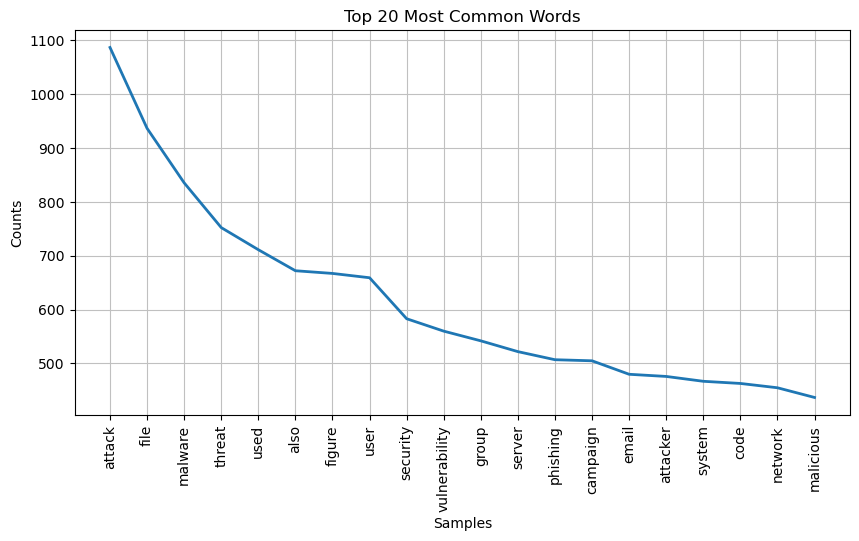

In [59]:
all_tokens = [word for sublist in activity['tokenize_text'] for word in sublist.split()]
fdist = FreqDist(all_tokens)
plt.figure(figsize=(10, 5))
fdist.plot(20, title='Top 20 Most Common Words')
plt.show()